<font face = "Time New Roman" size = 6>Import need pacages</font>

In [1233]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

<font face = "Time New Roman" size = 6>Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

# part3_result.csv is the file without deleting the Non registered organizations 
# It's used to compare the result
All the file need be modified manumally before importing

In [1234]:
#Orginal_data = pd.read_csv('./Original_dataset.csv',encoding = "ISO-8859-1")
#Causes_data = pd.read_csv('./Original_Causes.csv',encoding = "ISO-8859-1")

In [1235]:
#combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign Id*']) #Combined data set
#combined_data.to_csv('New_original_combined_data.csv', index=None)


In [1236]:
# Here need change the csv file from part3_result a little bit 
# Delete the space front and end of Campaign Goal manually
# Change the number into number type instead of accounting type
# Or it can be changed into numeric number
combined_data = pd.read_csv('./New_original_combined_data.csv',encoding = "ISO-8859-1")
#combined_data = pd.read_csv('./Final_data.csv',encoding = "ISO-8859-1")

<AxesSubplot: >

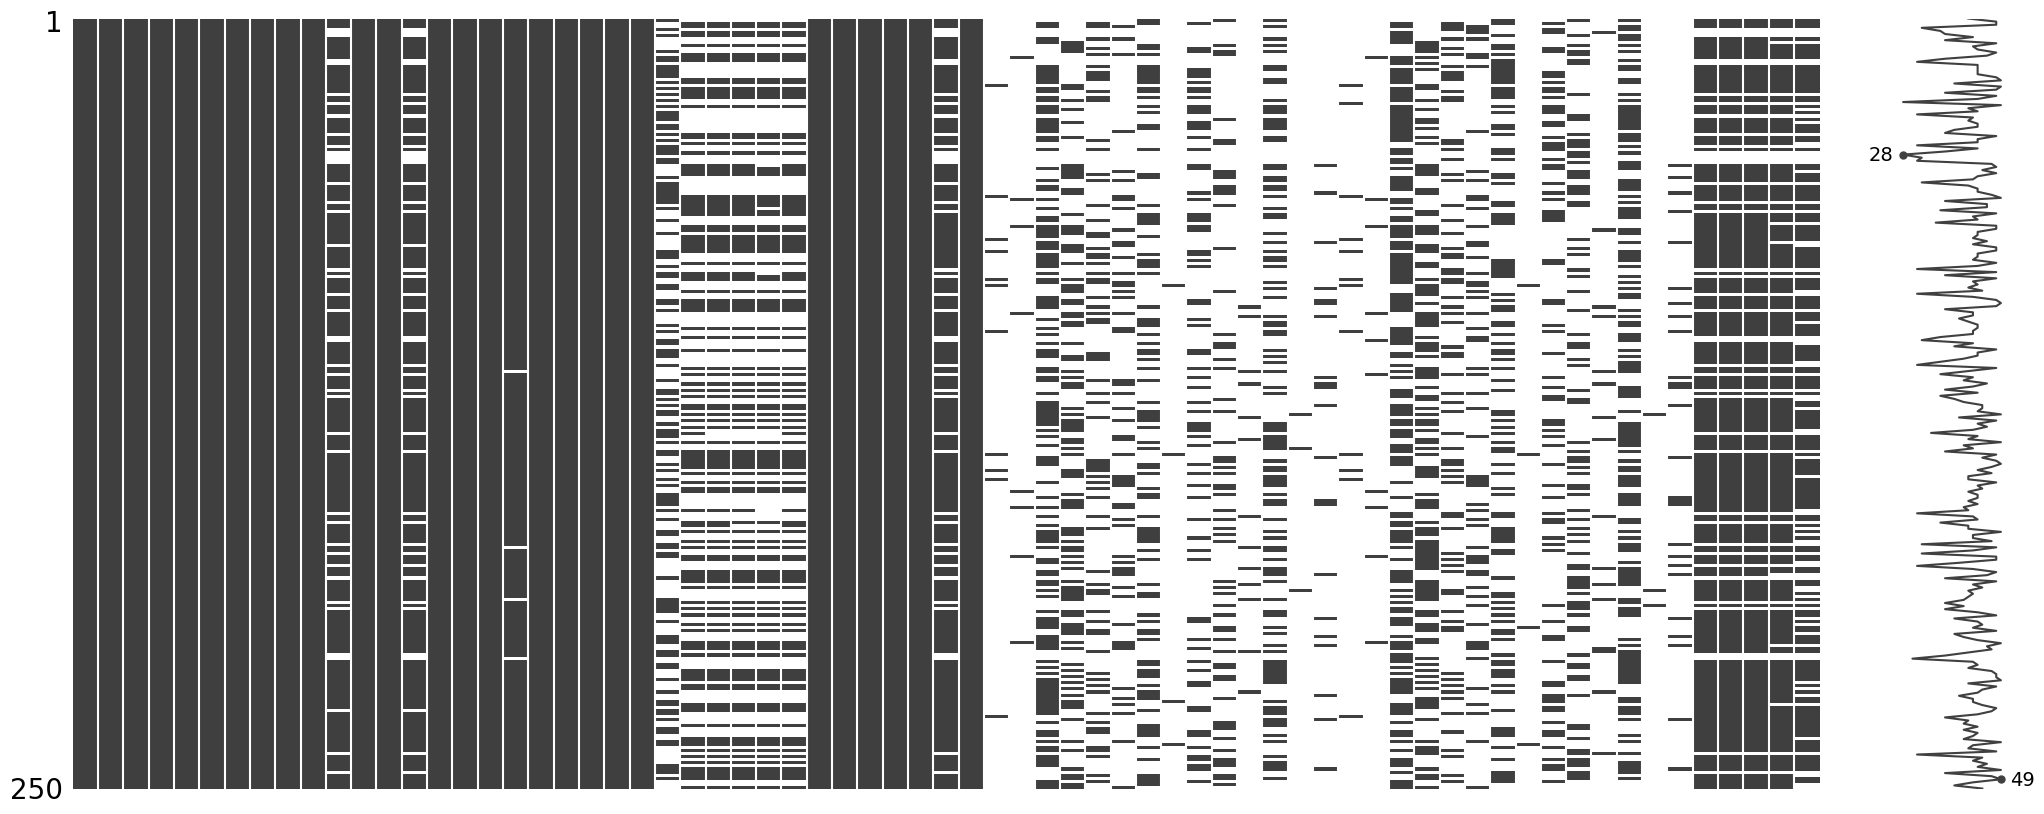

In [1237]:
msno.matrix(combined_data.sample(250))

In [1238]:
combined_data.columns #Show the columns of data set

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [1239]:
extract_data = combined_data #[Need_variable]
extract_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Cam Cause Health,Cam Cause Humanitarian,Cam Cause Social Service,Cam Cause Sports,Cam Cause Women & Girls,Pub Enquiry Person,Pub Enquiry Contact,Pub Enquiry Email,Web URL,Facebook Link
0,4608063,World Suicide Prevention Day 2017,Samaritans of Singapore,3102869,True,1,1,NPO,3102869,ENDED,...,NaN,NaN,Social Service,NaN,NaN,Sandra Wee,6221 2122,comms@sos.org.sg,www.sos.org.sg,SamaritansofSingapore
1,4648574,Enabling Lives,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,NPO,3105759,ENDED,...,NaN,NaN,NaN,NaN,NaN,Melissa Tan,6579 0794,melissa_tan@spd.org.sg,www.spd.org.sg,SPDSingapore
2,4661665,SPD Charity Hongbao 2017,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,NPO,3105759,ENDED,...,NaN,NaN,NaN,NaN,NaN,Melissa Tan,6579 0794,melissa_tan@spd.org.sg,www.spd.org.sg,SPDSingapore
3,4716038,Sundown Run 2017 - Running 4 HFH,Habitat for Humanity Singapore Ltd,3706352,True,2,1,INDIVIDUAL,4614452,ENDED,...,NaN,Humanitarian,Social Service,NaN,NaN,Habitat for Humanity Singapore,67447326,info@habitat.org.sg,www.habitat.org.sg,HabitatSG
4,4729527,Child For Child,Children's Cancer Foundation,3105049,False,2,1,INDIVIDUAL,4697816,ENDED,...,NaN,NaN,NaN,NaN,NaN,Fundraising Team,62293701,fundraising@ccf.org.sg,www.ccf.org.sg,sgccf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,81620010,#EndowusGivesBack to Gardens by the Bay,Gardens by the Bay,44329126,True,2,1,Corporate,67580280,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,Gardens by the Bay,64206848,feedback@gardensbythebay.com.sg,www.gardensbythebay.com.sg,gardensbythebay
15975,81633179,Support Loke Chui Yee in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,INDIVIDUAL,63267540,ACTIVE,...,Health,NaN,NaN,NaN,NaN,SingHealth Polyclinics Development Office,63507549,givingtoshp@singhealth.com.sg,Polyclinic.singhealth.com.sg,NaN
15976,81633303,Support Derek Tse in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,INDIVIDUAL,63267540,ACTIVE,...,Health,NaN,NaN,NaN,NaN,SingHealth Polyclinics Development Office,63507549,givingtoshp@singhealth.com.sg,Polyclinic.singhealth.com.sg,NaN
15977,81635547,WE@SG Trivia Night,Daughters Of Tomorrow Limited,3675791,True,4,1,INDIVIDUAL,81631190,ACTIVE,...,NaN,NaN,Social Service,NaN,Women & Girls,Jonathan Tan,81183663,donorrelations@DaughtersOfTomorrow.com,www.daughtersoftomorrow.org/,daughtersoftomorrow


<AxesSubplot: >

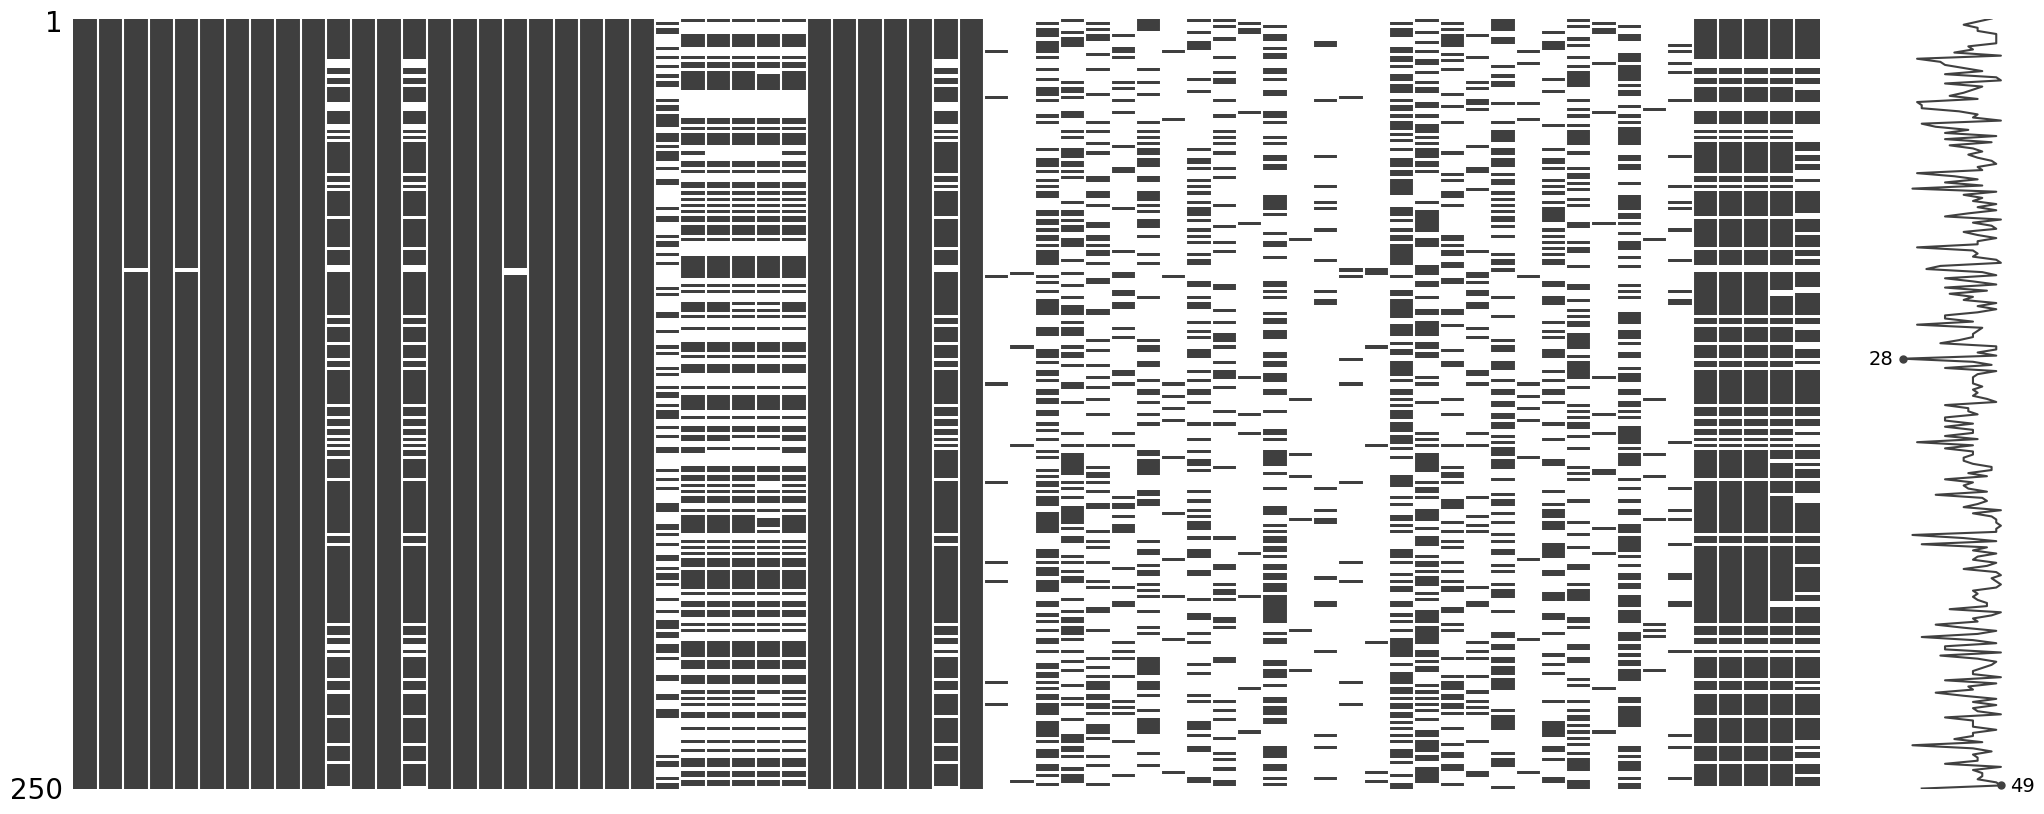

In [1240]:
msno.matrix(extract_data.sample(250))

In [1241]:
extract_data = extract_data.fillna('0')  #fill some missing causes data with 0

<AxesSubplot: >

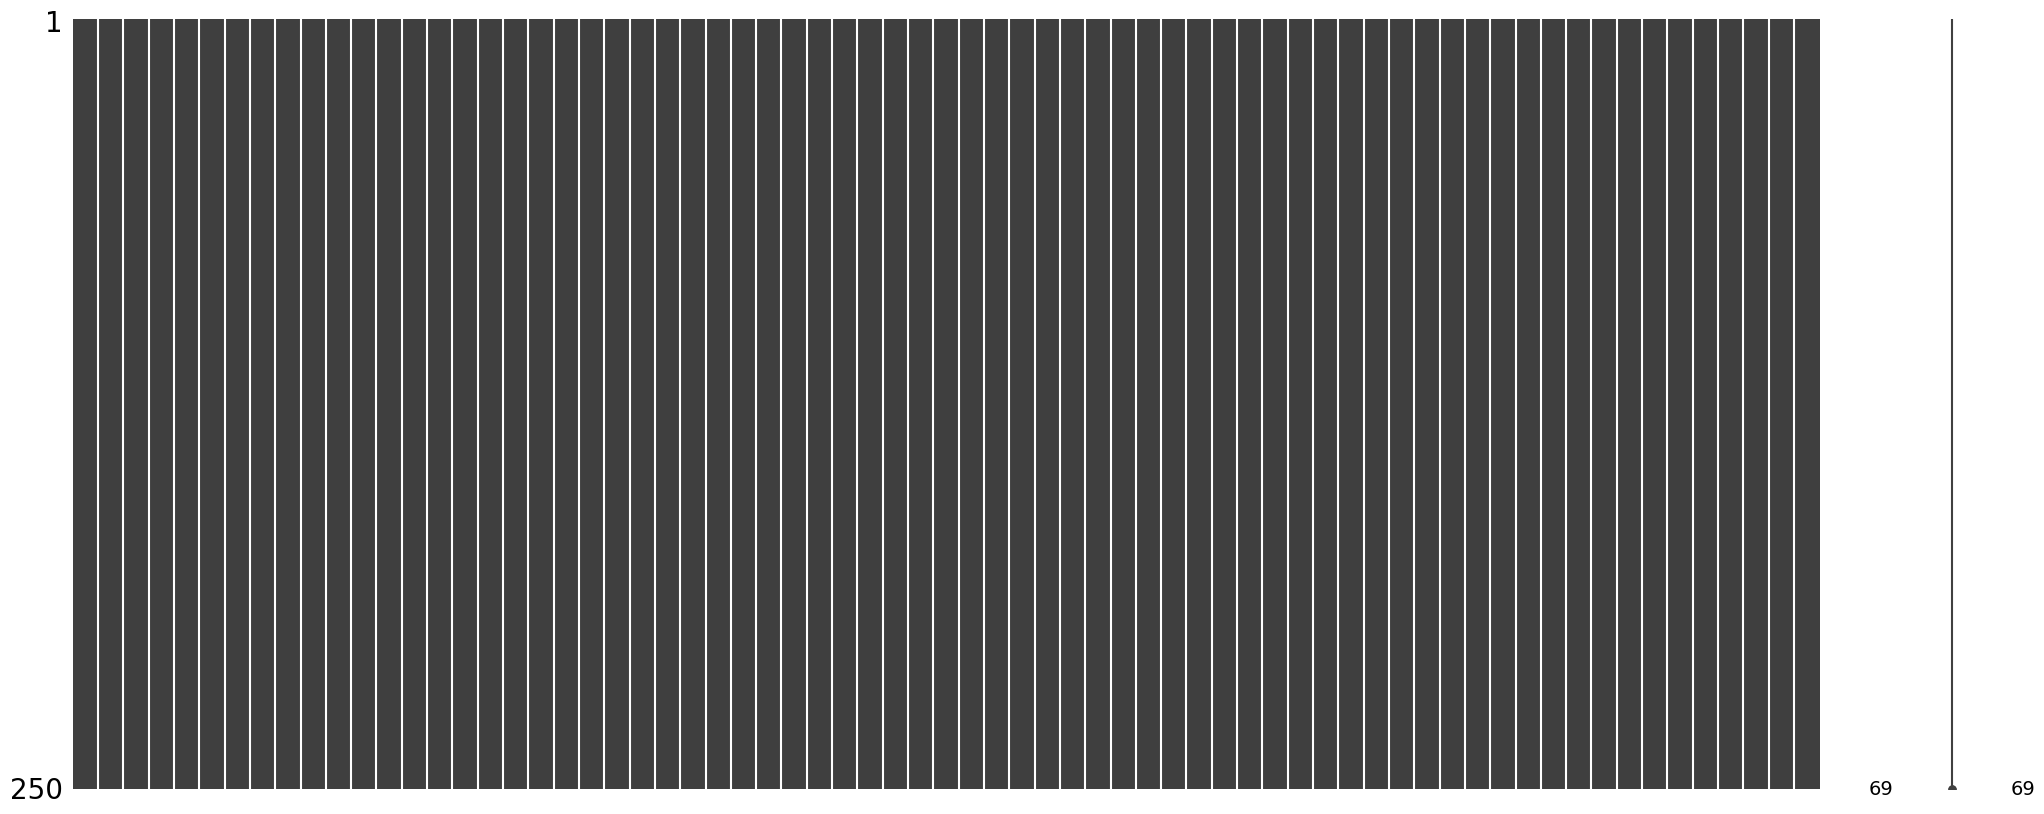

In [1242]:
msno.matrix(extract_data.sample(250))

In [1243]:

Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

15979


In [1244]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15979 entries, 0 to 15978
Data columns (total 69 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Campaign Id*                                                                   15979 non-null  int64 
 1   Campaign Title_x                                                               15979 non-null  object
 2   Receiving NPO Name*                                                            15979 non-null  object
 3   Receiving NPO Id*                                                              15979 non-null  int64 
 4   NPO Status*                                                                    15979 non-null  object
 5   Number of campaigns from the same NPO that started within the same Year Month  15979 non-null  int64 
 6   Public Campaign Access*       

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [1245]:
extract_data['Distinct Donors'] = pd.to_numeric( extract_data['Distinct Donors']) 
extract_data['Actual Donation Amount'] = pd.to_numeric( extract_data['Actual Donation Amount']) 

In [1246]:
extract_data['Creator Type*'].unique()

array(['NPO', 'INDIVIDUAL', 'COMMUNITY', 'CORPORATE', 'SCHOOL', 'OTHER',
       'GOVERNMENT', 'Corporate'], dtype=object)

In [1247]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0
Creator_type = ['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY', 'CORPORATE', 'GOVERNMENT', 'SCHOOL']
# Sector = ['Social and Welfare', 'Others', 'Health', 'Arts and Heritage', 'Sports', 'Education', 'Religious', 'Community']
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
for j in range(len(extract_data["Actual Donation Amount"])):
    if extract_data["Distinct Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual Donation Amount'].iloc[j]/extract_data['Distinct Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO Ipc Status For Tax Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO Ipc Status For Tax Deductibility'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'NPO Ipc Status For Tax Deductibility'] = 0
    if extract_data['Creator Type*'].iloc[j] == Creator_type[0]:
        extract_data['Creator Type*'].iloc[j] = 0
    if extract_data['Creator Type*'].iloc[j] == Creator_type[1]:
        extract_data['Creator Type*'].iloc[j] = 1
    if extract_data['Creator Type*'].iloc[j] == Creator_type[2]:
        extract_data['Creator Type*'].iloc[j] = 2
    if extract_data['Creator Type*'].iloc[j] == Creator_type[3]:
        extract_data['Creator Type*'].iloc[j] = 3
    if extract_data['Creator Type*'].iloc[j] == Creator_type[4]:
        extract_data['Creator Type*'].iloc[j] = 4
    if extract_data['Creator Type*'].iloc[j] == Creator_type[5]:
        extract_data['Creator Type*'].iloc[j] = 5
    if extract_data['Creator Type*'].iloc[j] == Creator_type[6]:
        extract_data['Creator Type*'].iloc[j] = 6
    if extract_data['Creator Type*'].iloc[j] == Creator_type[7]:
        extract_data['Creator Type*'].iloc[j] = 7
'''
    if extract_data['Sector'].iloc[j] == Sector[0]:
        extract_data['Sector'].iloc[j] = 0
    if extract_data['Sector'].iloc[j] == Sector[1]:
        extract_data['Sector'].iloc[j] = 1
    if extract_data['Sector'].iloc[j] == Sector[2]:
        extract_data['Sector'].iloc[j] = 2
    if extract_data['Sector'].iloc[j] == Sector[3]:
        extract_data['Sector'].iloc[j] = 3
    if extract_data['Sector'].iloc[j] == Sector[4]:
        extract_data['Sector'].iloc[j] = 4
    if extract_data['Sector'].iloc[j] == Sector[5]:
        extract_data['Sector'].iloc[j] = 5
    if extract_data['Sector'].iloc[j] == Sector[6]:
        extract_data['Sector'].iloc[j] = 6
    if extract_data['Sector'].iloc[j] == Sector[7]:
        extract_data['Sector'].iloc[j] = 7
'''

    
print("Number of deductibility:", num_deductibility)

Number of deductibility: 14998


# <font size =6 face = 'time new roman' color = red> Here is the Number of deducbility: 9633/10139 = 95.01%</font>

# <font size =6 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [1248]:
Org_causes = ['Org Cause Animal Welfare', 'Org Cause Arts & Heritage',
       'Org Cause Children & Youth', 'Org Cause Community',
       'Org Cause Disability', 'Org Cause Education', 'Org Cause Elderly',
       'Org Cause Environment', 'Org Cause Families', 'Org Cause Health',
       'Org Cause Humanitarian', 'Org Cause Social Service',
       'Org Cause Sports', 'Org Cause Women & Girls',
       ]
Cam_causes = ['Cam Cause Animal Welfare', 'Cam Cause Arts & Heritage',
       'Cam Cause Children & Youth', 'Cam Cause Community',
       'Cam Cause Disability', 'Cam Cause Education', 'Cam Cause Elderly',
       'Cam Cause Environment', 'Cam Cause Families', 'Cam Cause Health',
       'Cam Cause Humanitarian', 'Cam Cause Social Service',
       'Cam Cause Sports', 'Cam Cause Women & Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [1249]:
Image_Number = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign Image Number"] =  Image_Number(extract_data["Campaign Image1 Id"],extract_data["Campaign Image2 Id"],extract_data["Campaign Image3 Id"],extract_data["Campaign Image4 Id"],extract_data["Campaign Image5 Id"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [1250]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)

extract_data["Campaign Video"] = Video_or_not(extract_data["Campaign Video"])
extract_data["Campaign Video"].unique()

array([1, 0])

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [1251]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign Duration'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign Start Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign Start Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign Start Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign Start Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign End Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign End Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign End Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'Campaign Duration'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#    if extract_data.loc[i, 'Campaign Duration'] < 0:
#        extract_data.loc[i, 'Campaign Duration'] = 0
    i += 1

In [1252]:

Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
extract_data['Campaign_Start_Year_category'] = 0
for j in range(len(extract_data["Actual Donation Amount"])):
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[0]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 0
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[1]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 1
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[2]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 2
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[3]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 3
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[4]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 4
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[5]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 5


# <font size =6 face = 'time new roman' >Here delete the rows where Campaign Duration less than 1</font>

In [1253]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign Duration'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where duraiton less than 0: 180


In [1254]:
Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5']
Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

In [1317]:
extract_data['Msg_category'] = 0



for index,row in extract_data.iterrows():
    last_category = 0
    current_category = 0
    final_category = 0
    for index_col in Impact_msg_list:
        s = extract_data.loc[index, index_col]
        if(sentence_length(s)<=2): # Write nothing
            current_category = 0
        else:
            if(sentence_length(s)<=10): # Write very little
                current_category = 1
            else:
                if(sentence_length(s)<20): # Write very little
                    current_category = 2
                else:
                    current_category = 3
        if(current_category == last_category):
            last_category = current_category
        else:
            last_category = current_category if current_category>last_category else last_category # if different choose higher one
    #Msg_length = sentence_length(s)
    extract_data.loc[index,'Msg_category'] =  last_category #0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
    cnt += 1
 

In [1319]:
import distance
extract_data['Total_distance'] = 0
def edit_distance(s1, s2):
    return distance.levenshtein(s1, s2)
for j in range(len(Impact_msg_list)-2):
    for i in range(extract_data[Impact_msg_list[j]].shape[0]):
        str1 = extract_data[Impact_msg_list[j]].iloc[i]
        str2 = extract_data[Impact_msg_list[j+1]].iloc[i]
        extract_data['Total_distance'].iloc[i] += edit_distance(str1, str2)

In [1320]:
# besed on length and distance to divide into three new category
extract_data['new_msg_category'] = 0
for index,row in extract_data.iterrows():
    if extract_data.loc[index,'Msg_category'] == 1 or extract_data.loc[index,'Msg_category'] == 2 or extract_data.loc[index,'Msg_category'] == 3:
        if extract_data.loc[index,'Total_distance'] >150:
            extract_data.loc[index,'new_msg_category'] = 3
        else:
            if extract_data.loc[index,'Total_distance'] > 0:
                extract_data.loc[index,'new_msg_category'] = 2
            else:
                extract_data.loc[index,'new_msg_category'] = 1

extract_data.iloc[0:30,28:]

,Impact Message 5,Custom Amount 1,Custom Amount 2,Custom Amount 3,Custom Amount 4,Description of Campaign,Description of NPO,Campaign Title_y,Org Cause Animal Welfare,Org Cause Arts & Heritage,...,Log campaign Goal,Log campaign Duration,Log avg custom amount,Future tense X Campaign frequency,Campaign frequency X Log avg custom amount,Campaign success,Log campaign success,new_msg_category,Msg_category,Total_distance
0,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2017,0,0,...,10.819778,5.529429,4.499810,1.0,4.499810,0.111220,-2.196245,1,3,0
1,Thank you for donating.,10,50,100,200,"Over the years at SPD, we saw how assistive te...",SPD is a local charity set up in 1964 to help ...,Enabling Lives,0,0,...,9.903488,4.488636,4.499810,0.0,8.999619,0.140500,-1.962548,1,3,0
2,Thank you for donating.,10,50,100,200,"In 2007, SPD started its Charity Hongbao fundr...",SPD is a local charity set up in 1964 to help ...,SPD Charity Hongbao 2017,0,0,...,10.308953,4.060443,4.499810,0.0,8.999619,0.037267,-3.289656,1,3,0
3,0,0,0,0,0,Hi Everybody! \r\n\r\nWe are a group of 4 pers...,Habitat for Humanity Singapore is part of an i...,Sundown Run 2017 - Running 4 HFH,0,0,...,7.600902,4.477337,-100000.000000,0.0,-200000.000000,1.400000,0.336472,1,3,0
4,0,0,0,0,0,My name is Dhanyatha and I am turning 2 this m...,Children's Cancer Foundation (CCF) is a social...,Child For Child,0,0,...,8.517193,3.912023,-100000.000000,0.0,-200000.000000,0.406000,-0.901402,1,3,0
6,0,0,0,0,0,Hello everyone! Happy New Year!\r\n\r\nWith t...,The VIVA Foundation for Children with Cancer i...,Darius' Birthday Wish,0,0,...,6.907755,3.555348,-100000.000000,0.0,-100000.000000,1.050000,0.048790,1,3,0
7,Thank you for donating.,10,50,100,200,Stray rescue in Singapore is a determined and ...,Oasis Second Chance Animal Shelter Ltd (OSCAS)...,Care and feeding for over 100 shelter dogs,Animal Welfare,0,...,8.517193,5.891644,4.499810,0.0,4.499810,0.812000,-0.208255,1,3,0
8,0,0,0,0,0,Do you want to have a different 2017?\r\nSuppo...,Community Chest is the philanthropy and engage...,Red Packet Love,0,0,...,6.214608,3.737670,-100000.000000,0.0,-100000.000000,1.100000,0.095310,1,3,0
9,Thank you for your donation in support of the ...,10,50,100,200,GIVE THE GIFT OF HOPE\r\n\r\nPersons with auti...,"Out of passion to care for the physical, emoti...",Support St. Andrew's Autism Centre,0,0,...,14.508658,5.899897,4.499810,0.0,13.499429,0.019422,-3.941349,1,3,0
10,May your donation grant you as much happiness ...,10,50,100,200,Daily Dinner Delivery is a Program where 300 M...,Free Food for All (FFFA) had given out more t...,Daily Dinner Delivery,0,0,...,11.225243,4.955827,4.499810,4.0,8.999619,0.504067,-0.685047,1,3,0


In [1255]:
# Nunber of description words
extract_data['Number of words describing campaign'] = 0
extract_data['Num_desc_NPO'] = 0
for index, row in extract_data.iterrows():
    
    extract_data.loc[index, 'Number of words describing campaign'] = sentence_length( str(extract_data.loc[index, 'Description of Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description of NPO']))


In [1256]:
Total_Rows

15799

# 删除NPO为空的数据

In [1257]:

num1 = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Num_desc_NPO'] <= 1:
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete numbers where Num_desc_NPO less than 1:", num1)  
Total_Rows = extract_data.shape[0]


Total delete numbers where Num_desc_NPO less than 1: 2572


# 把description内容筛选一遍

In [1258]:
num2 = 0
num3 = 0
for index, row in extract_data.iterrows():
    if "test" in str(extract_data.loc[index, 'Description of Campaign']) or "Test" in str(extract_data.loc[index, 'Description of Campaign']) and extract_data.loc[index, 'Number of words describing campaign']< 10:
        #extract_data.drop(index, inplace=True)
        num2 += 1
    if extract_data.loc[index, 'Number of words describing campaign']< 5:
        num2 += 1
print("Total delete numbers:", num2)  


Total delete numbers: 475


In [1259]:
# extract_data['Cam_Org_causes'] = extract_data['Org_causes']-extract_data['Cam_causes']

# Average donation per donator

In [1260]:
# extract_data['Avg_donation_amount'] =  extract_data['Actual_Donation_Amount']/extract_data['Distinct_Donors']

# <font size =6 face = 'time new roman' >Here delete the rows where Actual_Donation_Amount is 0 but Distinct_Donors bigger than 0</font>

In [1261]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual Donation Amount'] <= 0 and extract_data.loc[index,'Distinct Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0: 99


In [1262]:
extract_data['Avg custom amount'] = (extract_data['Custom Amount 1']+extract_data['Custom Amount 2'] +extract_data['Custom Amount 3'] + extract_data['Custom Amount 4'] )/4


In [1263]:
extract_data[0:10]

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,Campaign Duration,Campaign_Start_Year_category,Number of words describing campaign,Num_desc_NPO,Avg custom amount
0,4608063,World Suicide Prevention Day 2017,Samaritans of Singapore,3102869,True,1,1,0,3102869,ENDED,...,10,9,2017,2017-1-1,2017-9-10,252,0,161,163,90.0
1,4648574,Enabling Lives,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,0,3105759,ENDED,...,31,3,2017,2017-1-1,2017-3-31,89,0,209,164,90.0
2,4661665,SPD Charity Hongbao 2017,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,0,3105759,ENDED,...,28,2,2017,2017-1-1,2017-2-28,58,0,155,164,90.0
3,4716038,Sundown Run 2017 - Running 4 HFH,Habitat for Humanity Singapore Ltd,3706352,True,2,1,1,4614452,ENDED,...,31,3,2017,2017-1-2,2017-3-31,88,0,160,92,0.0
4,4729527,Child For Child,Children's Cancer Foundation,3105049,False,2,1,1,4697816,ENDED,...,20,2,2017,2017-1-1,2017-2-20,50,0,65,164,0.0
6,4733930,Darius' Birthday Wish,VIVA Foundation for Children with Cancer,3098888,True,1,1,1,4726915,ENDED,...,7,2,2017,2017-1-3,2017-2-7,35,0,159,128,0.0
7,4734142,Care and feeding for over 100 shelter dogs,Oasis Second Chance Animal Shelter Ltd,3099284,True,1,1,0,3099284,ENDED,...,31,12,2017,2017-1-3,2017-12-31,362,0,85,58,90.0
8,4735155,Red Packet Love,Community Chest,3120251,True,1,1,1,4680353,ENDED,...,14,2,2017,2017-1-3,2017-2-14,42,0,32,157,0.0
9,4735590,Support St. Andrew's Autism Centre,St. Andrew's Mission Hospital,3105261,True,3,1,0,3105261,ENDED,...,3,1,2018,2017-1-3,2018-1-3,365,0,57,163,90.0
10,4736966,Daily Dinner Delivery,Free Food For All Limited,3100948,True,2,1,0,3100948,ENDED,...,31,5,2017,2017-1-9,2017-5-31,142,0,178,111,90.0


# <font size =6 face = 'time new roman' >Polarity</font>

In [1264]:
'''
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0
'''

extract_data['Description_Campaign_polarity'] = 0
#extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
#Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5','Description of Campaign']
Impact_msg_list = ['Description of Campaign']
#Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg_polarity_list = ['Description_Campaign_polarity']
#Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        #extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
#extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
#extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]


,Impact Message 5,Custom Amount 1,Custom Amount 2,Custom Amount 3,Custom Amount 4,Description of Campaign,Description of NPO,Campaign Title_y,Org Cause Animal Welfare,Org Cause Arts & Heritage,...,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,Campaign Duration,Campaign_Start_Year_category,Number of words describing campaign,Num_desc_NPO,Avg custom amount,Description_Campaign_polarity
0,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2017,0,0,...,9,2017,2017-1-1,2017-9-10,252,0,161,163,90.0,0.405556
1,Thank you for donating.,10,50,100,200,"Over the years at SPD, we saw how assistive te...",SPD is a local charity set up in 1964 to help ...,Enabling Lives,0,0,...,3,2017,2017-1-1,2017-3-31,89,0,209,164,90.0,0.328247
2,Thank you for donating.,10,50,100,200,"In 2007, SPD started its Charity Hongbao fundr...",SPD is a local charity set up in 1964 to help ...,SPD Charity Hongbao 2017,0,0,...,2,2017,2017-1-1,2017-2-28,58,0,155,164,90.0,0.421733
3,0,0,0,0,0,Hi Everybody! \r\n\r\nWe are a group of 4 pers...,Habitat for Humanity Singapore is part of an i...,Sundown Run 2017 - Running 4 HFH,0,0,...,3,2017,2017-1-2,2017-3-31,88,0,160,92,0.0,0.307500
4,0,0,0,0,0,My name is Dhanyatha and I am turning 2 this m...,Children's Cancer Foundation (CCF) is a social...,Child For Child,0,0,...,2,2017,2017-1-1,2017-2-20,50,0,65,164,0.0,-0.125000
6,0,0,0,0,0,Hello everyone! Happy New Year!\r\n\r\nWith t...,The VIVA Foundation for Children with Cancer i...,Darius' Birthday Wish,0,0,...,2,2017,2017-1-3,2017-2-7,35,0,159,128,0.0,0.266544
7,Thank you for donating.,10,50,100,200,Stray rescue in Singapore is a determined and ...,Oasis Second Chance Animal Shelter Ltd (OSCAS)...,Care and feeding for over 100 shelter dogs,Animal Welfare,0,...,12,2017,2017-1-3,2017-12-31,362,0,85,58,90.0,0.162245
8,0,0,0,0,0,Do you want to have a different 2017?\r\nSuppo...,Community Chest is the philanthropy and engage...,Red Packet Love,0,0,...,2,2017,2017-1-3,2017-2-14,42,0,32,157,0.0,0.197917
9,Thank you for your donation in support of the ...,10,50,100,200,GIVE THE GIFT OF HOPE\r\n\r\nPersons with auti...,"Out of passion to care for the physical, emoti...",Support St. Andrew's Autism Centre,0,0,...,1,2018,2017-1-3,2018-1-3,365,0,57,163,90.0,0.250000
10,May your donation grant you as much happiness ...,10,50,100,200,Daily Dinner Delivery is a Program where 300 M...,Free Food for All (FFFA) had given out more t...,Daily Dinner Delivery,0,0,...,5,2017,2017-1-9,2017-5-31,142,0,178,111,90.0,0.126389


# 情感测试

In [1265]:
#from textblob import TextBlob
#blob = TextBlob(str("So sad, unhappy. Catastrophe, fear"))
#sentiment = blob.sentiment
#print(sentiment.polarity)

<font face = "Time New Roman" size = 5>  Convert to numeric type</font>

In [1266]:
numeric_features1 = ['Actual Donation Amount', 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign',  'Cam_causes', 'Description_Campaign_polarity',"Creator Type*","Campaign_Start_Year", 'Campaign Promise']

extract_data['Actual Donation Amount'] = pd.to_numeric( extract_data['Actual Donation Amount'])
extract_data['Campaign Goal'] = pd.to_numeric( extract_data['Campaign Goal'])
extract_data['NPO Ipc Status For Tax Deductibility'] = pd.to_numeric( extract_data['NPO Ipc Status For Tax Deductibility'])
extract_data['Campaign Duration'] = pd.to_numeric( extract_data['Campaign Duration'])
extract_data['Campaign Video'] = pd.to_numeric( extract_data['Campaign Video'])
extract_data['Campaign Image Number'] = pd.to_numeric( extract_data['Campaign Image Number'])
extract_data['Number of words describing campaign'] = pd.to_numeric( extract_data['Number of words describing campaign'])

extract_data['Cam_causes'] = pd.to_numeric( extract_data['Cam_causes'])
extract_data['Creator Type*'] = pd.to_numeric(extract_data['Creator Type*'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO Ipc Status For Tax Deductibility'] = pd.to_numeric(extract_data['NPO Ipc Status For Tax Deductibility'])
extract_data['Campaign Video'] = pd.to_numeric(extract_data['Campaign Video'])
extract_data['Campaign_Start_Year_category'] = pd.to_numeric(extract_data['Campaign_Start_Year_category'])
#extract_data['Campaign Promise'] = pd.to_numeric(extract_data['Campaign Promise'])

extract_data["Distinct Donors"] = pd.to_numeric(extract_data["Distinct Donors"])
#extract_data['Sector'] = pd.to_numeric( extract_data['Sector'])


In [1267]:
extract_data.columns[0:]

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [1268]:
extract_data['Campaign Video'].unique()

array([1, 0])

# Future tense

In [1269]:
# It is accomplished mainly by using word_tokenize package.
# import the releated package
from nltk import word_tokenize, pos_tag
# This package is used for spliting the sentence
# Here is how it works
sentence = "Your donation will testament that suicide prevention is everyone's business."
tokens = word_tokenize(sentence)
print(tokens)
# ['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
# Tag different compoments in the sentence
print(pos_tag(tokens))
'''
Here is the result after taging
[('Your', 'PRP$'),
 ('donation', 'NN'),
 ('will', 'MD'),
 ('testament', 'VB'),
 ('that', 'IN'),
 ('suicide', 'JJ'),
 ('prevention', 'NN'),
 ('is', 'VBZ'),
 ('everyone', 'NN'),
 ("'s", 'POS'),
 ('business', 'NN'),
 ('.', '.')]
'''
# MD modal could, will
# So we can use the number of MD tags to judge the future tense.
# Another example   can.may.might.could.should.would.will.must.
sentence2 = 'Your donation will testament that suicide prevention is everyone business.Your $500 donation (5 tins) can contribute towards \
providing a month of meals for a child in HomeSweetHome@Admiralty (HSH).'
text = word_tokenize(sentence2)
tagged = pos_tag(text)

print( ([word for word in tagged if word[1] == "MD"]))
# The result is 2


['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
[('Your', 'PRP$'), ('donation', 'NN'), ('will', 'MD'), ('testament', 'VB'), ('that', 'IN'), ('suicide', 'JJ'), ('prevention', 'NN'), ('is', 'VBZ'), ('everyone', 'NN'), ("'s", 'POS'), ('business', 'NN'), ('.', '.')]
[('will', 'MD'), ('can', 'MD')]


In [1270]:
len([word for word in tagged if word[1] == "VB"])

2

In [1271]:
MD_list = []
test = [word for word in tagged if word[1] == "MD"]
for ite in test:
    if ite[0] not in MD_list:
        MD_list.append(ite[0])
print(MD_list)

['will', 'can']


In [1272]:
from nltk import word_tokenize, pos_tag
MD_list = []
def determine_tense_input(sentence):
    text = word_tokenize(sentence)
    tagged = pos_tag(text)

    tense = {}
    
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    test = [word for word in tagged if word[1] == "MD"]
    for ite in test:
        if ite[0] not in MD_list:
            MD_list.append(ite[0])

    return(tense)

In [1273]:
MD_list

[]

In [1274]:
# Nunber of description words
extract_data['Future tense'] = 0
#extract_data['Num_desc_NPO'] = 0

for index, row in extract_data.iterrows():
    Impact_msg_str = ''
    Impact_msg_str += extract_data.loc[index,'Impact Message 1']
    Impact_msg_str += extract_data.loc[index,'Impact Message 2']
    Impact_msg_str += extract_data.loc[index,'Impact Message 3']
    Impact_msg_str += extract_data.loc[index,'Impact Message 4']
    Impact_msg_str += extract_data.loc[index,'Impact Message 5']
    
    extract_data.loc[index,'Future tense'] = determine_tense_input(Impact_msg_str)['future']

In [1275]:
extract_data['Future tense']

0        1
1        0
2        0
3        0
4        0
        ..
15974    0
15975    0
15976    0
15977    0
15978    4
Name: Future tense, Length: 13128, dtype: int64

# Log Transformation

In [1276]:
extract_data = extract_data.rename(columns={'Number of campaigns from the same NPO that started within the same Year Month':'Campaign frequency'})

In [1277]:
extract_data['Campaign frequency'] =  pd.to_numeric(extract_data['Campaign frequency'])

extract_data['Campaign_Start_Year'] =  pd.to_numeric(extract_data['Campaign_Start_Year'])

In [1278]:

math.log10(10)

1.0

In [1279]:
extract_data['Log actual Donation Amount']=0
extract_data['Log distinct Donors'] = 0
extract_data['Log campaign Goal'] = 0
extract_data['Log campaign Duration'] = 0
extract_data['Log avg custom amount'] = 0
extract_data.loc[index,'Future tense X Campaign frequency'] = 0
extract_data.loc[index,'Campaign frequency X Log avg custom amount'] = 0
extract_data['Campaign success'] = 0
extract_data['Log campaign success'] = 0
eps = 0.001
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual Donation Amount'] > 0:
        extract_data.loc[index,'Log actual Donation Amount'] = np.log(extract_data.loc[index,'Actual Donation Amount'])
    else:
        extract_data.loc[index,'Log actual Donation Amount'] = -100000
    if extract_data.loc[index,'Distinct Donors'] > 0:
        extract_data.loc[index,'Log distinct Donors'] = np.log(extract_data.loc[index,'Distinct Donors'])
    else:
        extract_data.loc[index,'Log distinct Donors'] = -100000
    if extract_data.loc[index,'Campaign Goal'] > 0:
        extract_data.loc[index,'Log campaign Goal'] = np.log(extract_data.loc[index,'Campaign Goal'])
    else:
        extract_data.loc[index,'Log campaign Goal'] = -100000
    if extract_data.loc[index,'Campaign Duration'] > 0:
        extract_data.loc[index,'Log campaign Duration'] = np.log(extract_data.loc[index,'Campaign Duration'])
    else:
        extract_data.loc[index,'Log campaign Duration'] = -100000
    if extract_data.loc[index,'Avg custom amount'] > 0:
        extract_data.loc[index,'Log avg custom amount'] = np.log(extract_data.loc[index,'Avg custom amount'])
    else:
        extract_data.loc[index,'Log avg custom amount'] = -100000
    if extract_data.loc[index,'Campaign Goal'] > 0 and extract_data.loc[index,'Distinct Donors'] > 0: 
        extract_data.loc[index,'Log campaign success'] = np.log( extract_data.loc[index,'Actual Donation Amount']/extract_data.loc[index,'Campaign Goal'])
        extract_data.loc[index,'Campaign success'] = extract_data.loc[index,'Actual Donation Amount']/extract_data.loc[index,'Campaign Goal']
    else:
        extract_data.loc[index,'Log campaign success'] = -100000
    extract_data.loc[index,'Future tense X Campaign frequency'] = extract_data.loc[index, 'Future tense'] * extract_data.loc[index,'Campaign frequency']
    extract_data.loc[index,'Campaign frequency X Log avg custom amount'] = extract_data.loc[index, 'Campaign frequency'] * extract_data.loc[index,'Log avg custom amount']


In [1280]:
np.exp(10)

22026.465794806718

In [1281]:
np.log(5)

1.6094379124341003

In [1282]:
extract_data.to_csv("20_5_2023.csv")

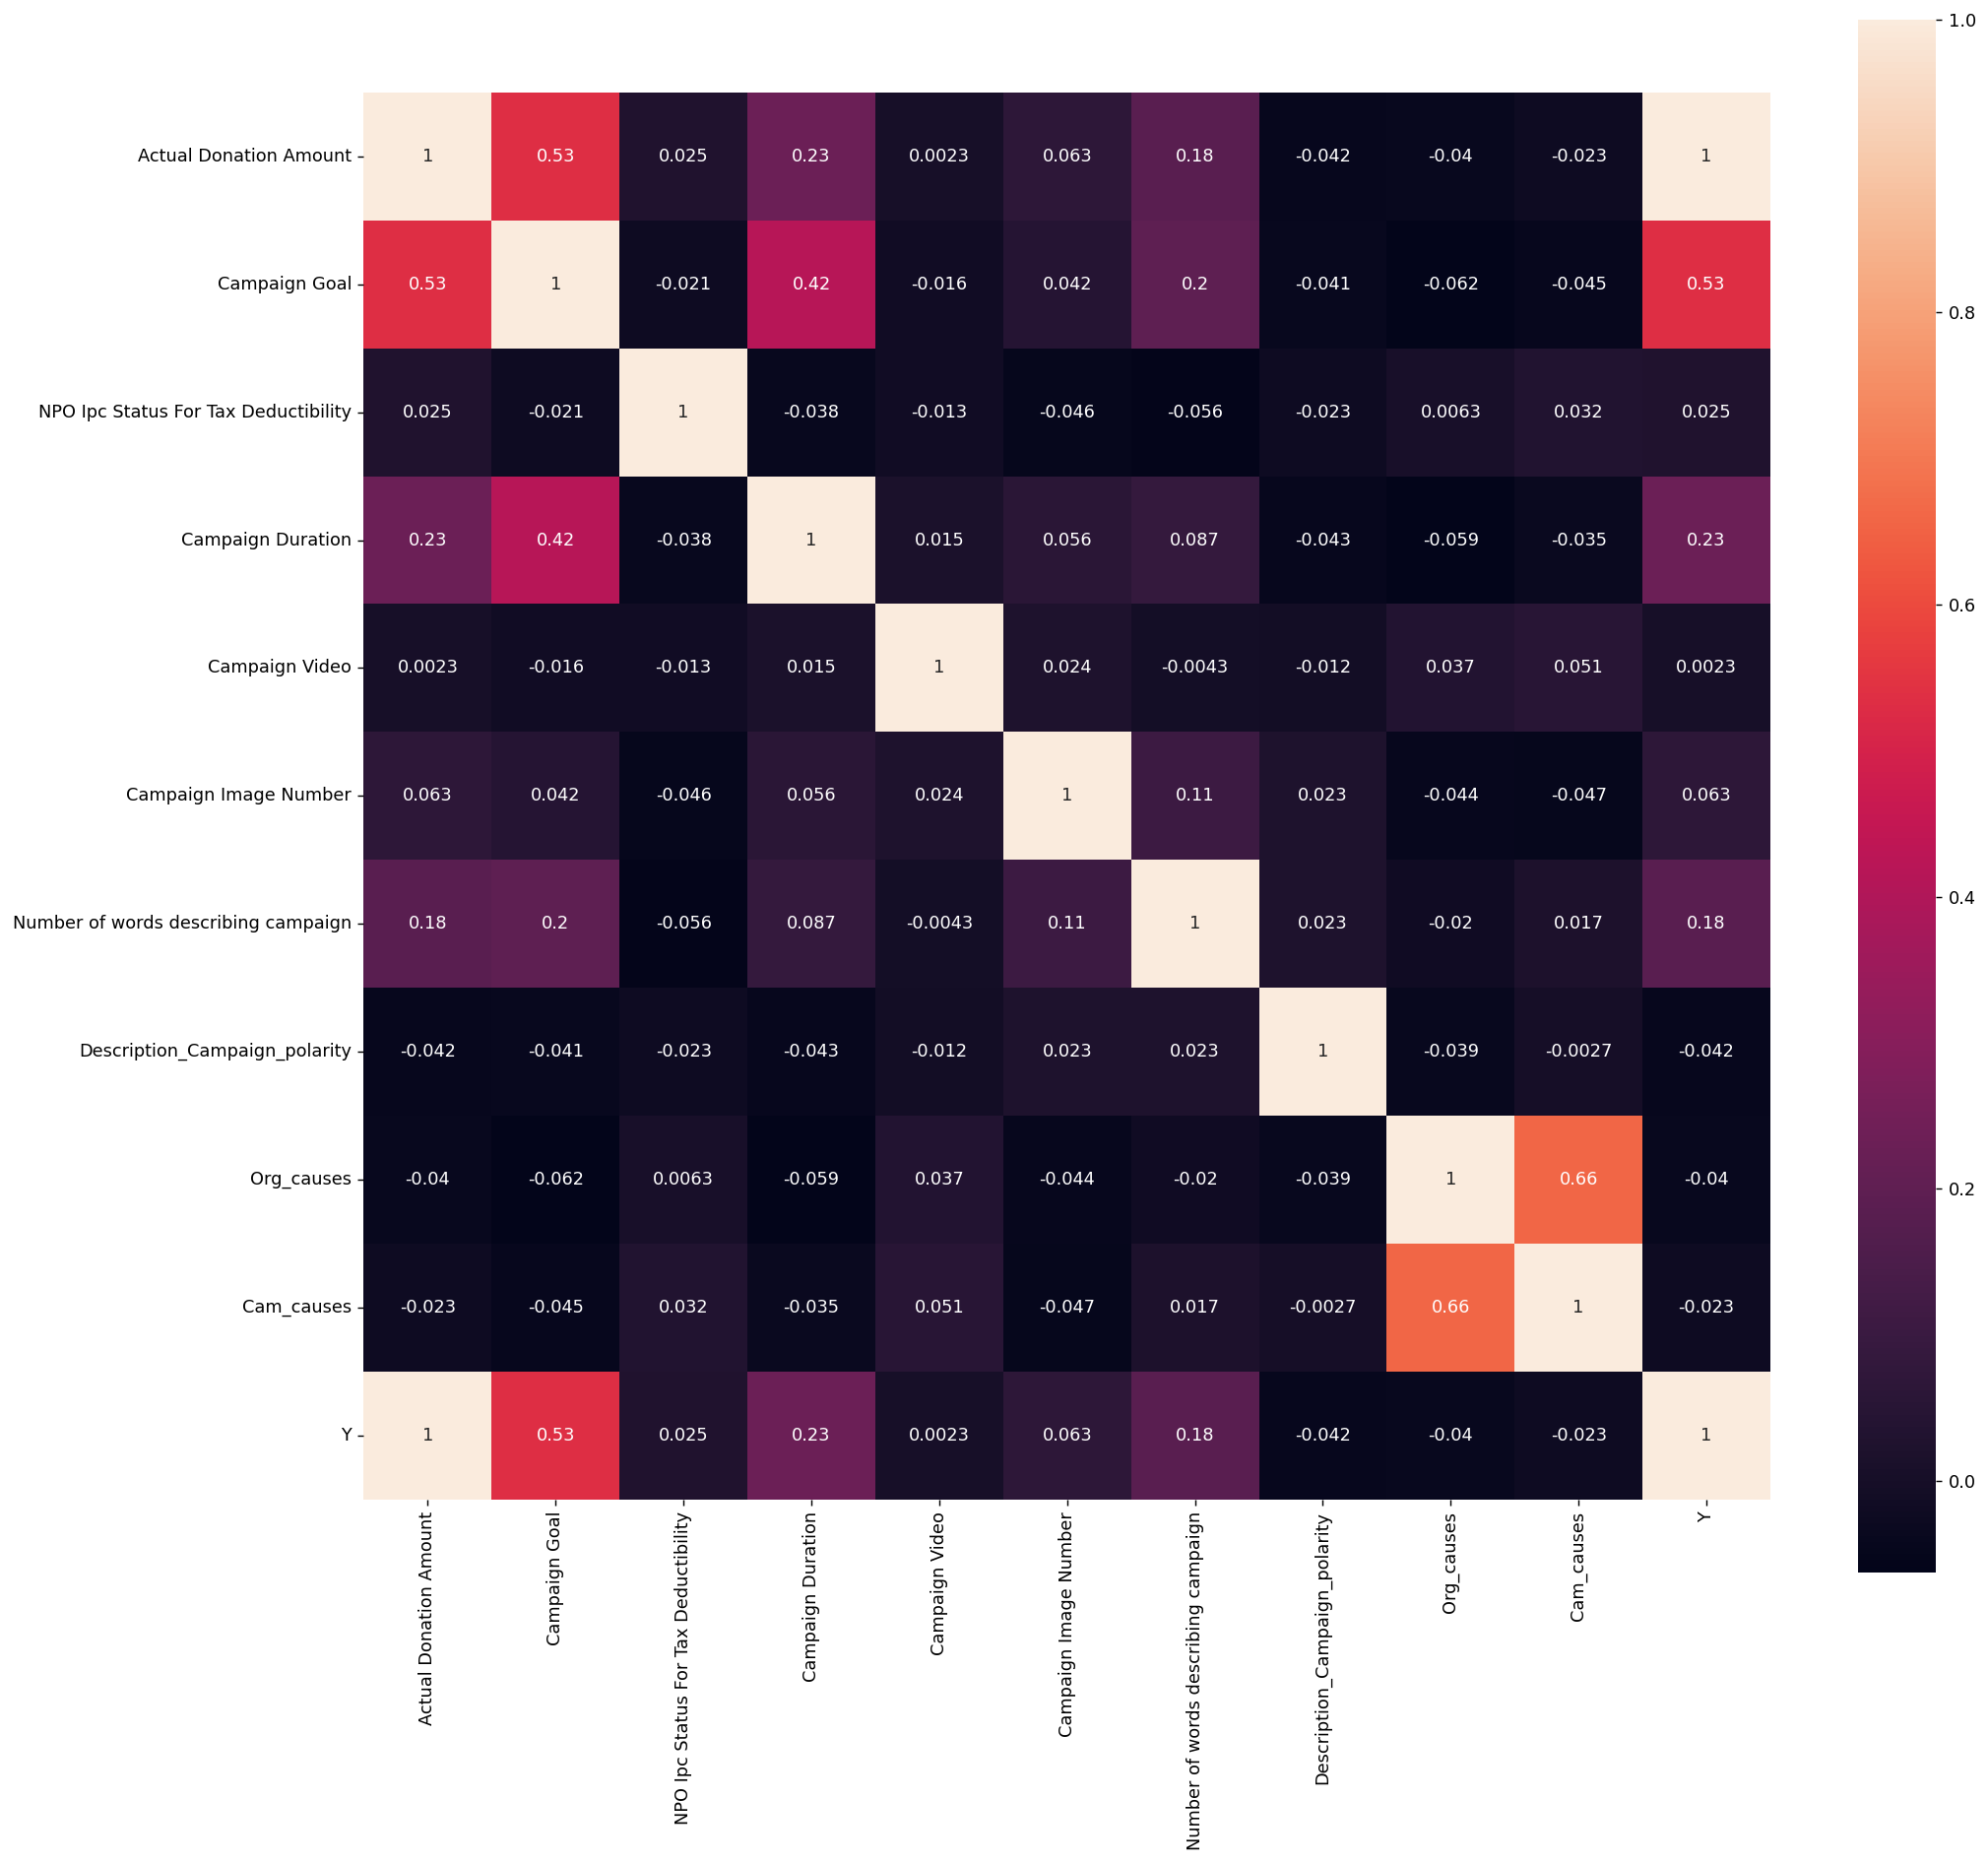

In [1333]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual Donation Amount', 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                      'Org_causes', 'Cam_causes']

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual Donation Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

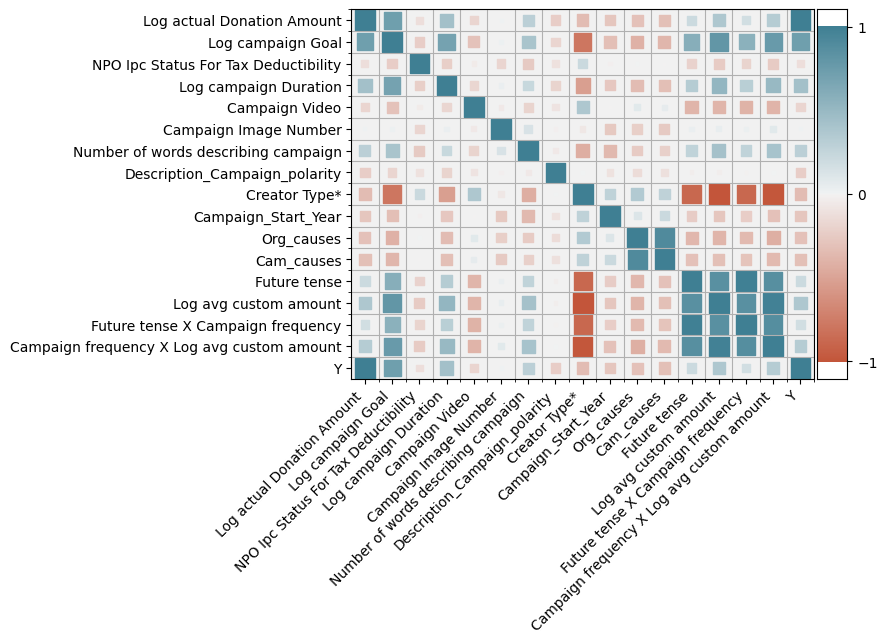

In [1284]:
# pip install heatmapz

from heatmap import heatmap, corrplot

corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

Do a scatter plot, using IV with a DV 

Scatter plot 1
Actual Donation Amount + Campaign Promise

Scatter plot 2
Actual Donation Amount + Campaign Promise

Scatter plot 3
Number of distinct donors   + Campaign Promise

Scatter plot 4 
Number of distinct donors  + Campaign Promise

In [1285]:
extract_data.columns

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*', 'Campaign frequency',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause Children & Youth',
       'Org Cause Community', 'Org Cause Disab

In [1286]:
'''
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Distinct Donors"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(223)
plt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.show()
'''

'\nplt.figure(figsize=(15,15))\n\nplt.subplot(221)\nplt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(222)\nplt.scatter(extract_data["Distinct Donors"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(223)\nplt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(224)\nplt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.show()\n'

Text(0, 0.5, 'Number')

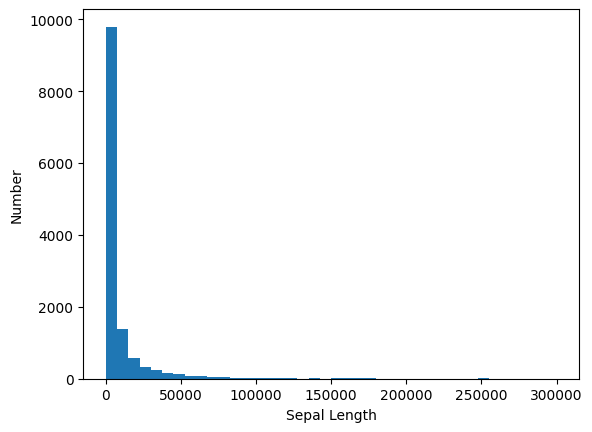

In [1287]:
plt.hist(extract_data['Actual Donation Amount'], bins=40, range=(0,300000))
plt.xlabel('Sepal Length'); plt.ylabel('Number')

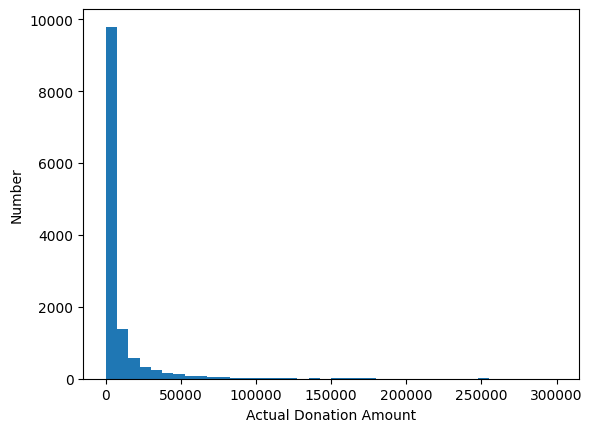

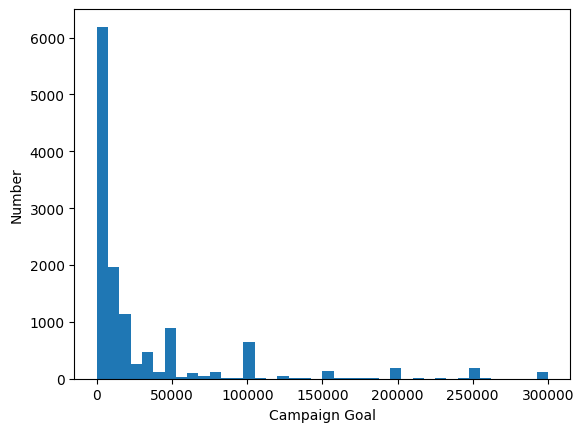

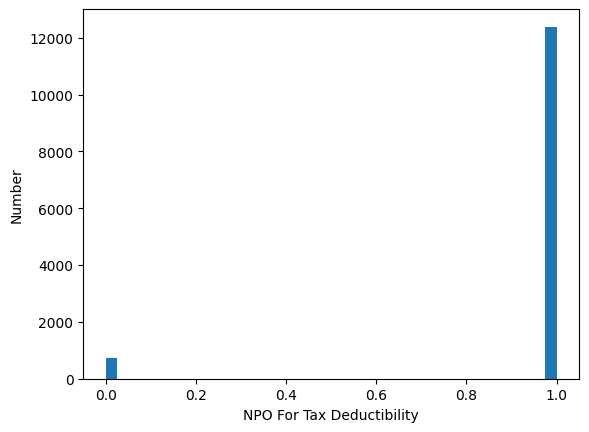

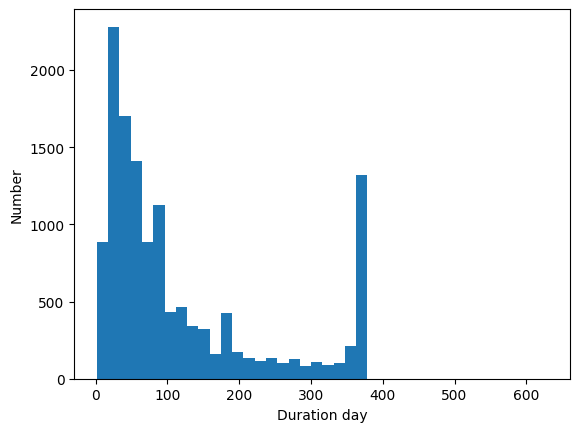

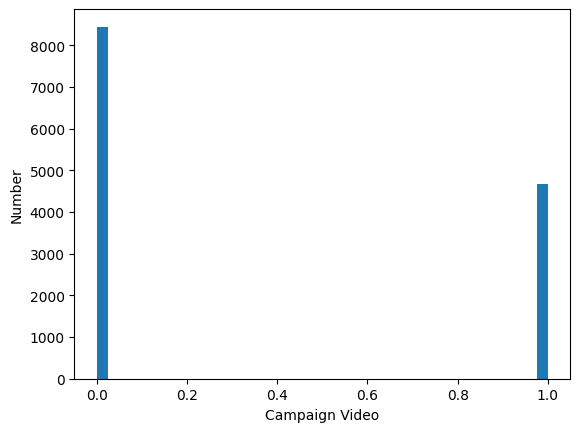

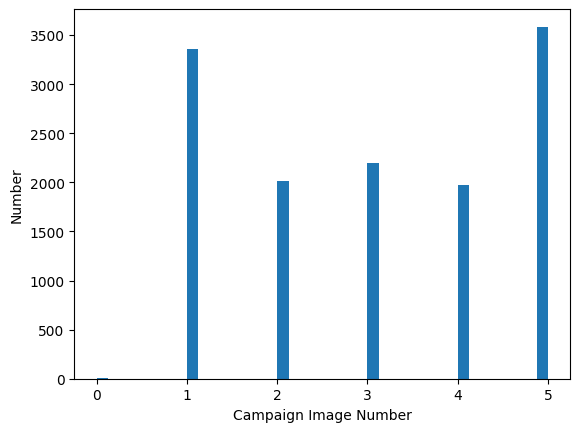

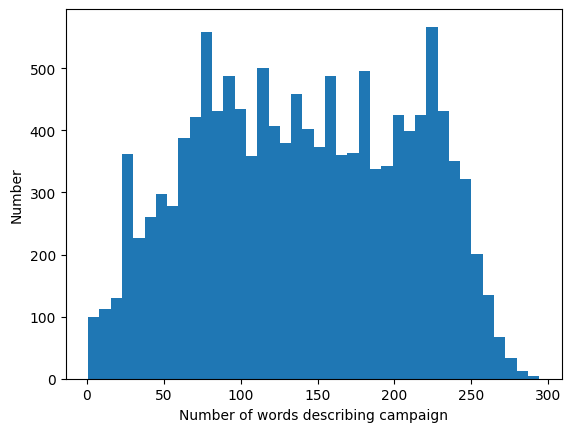

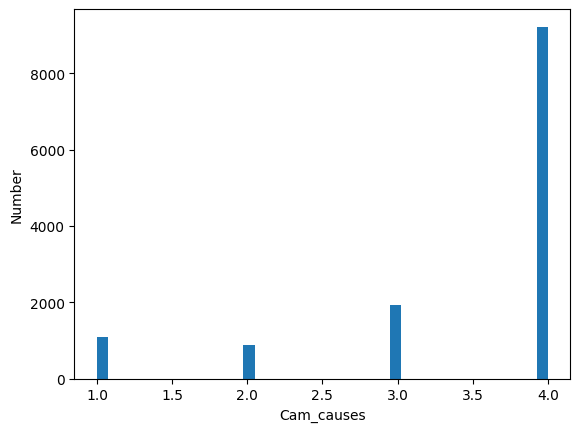

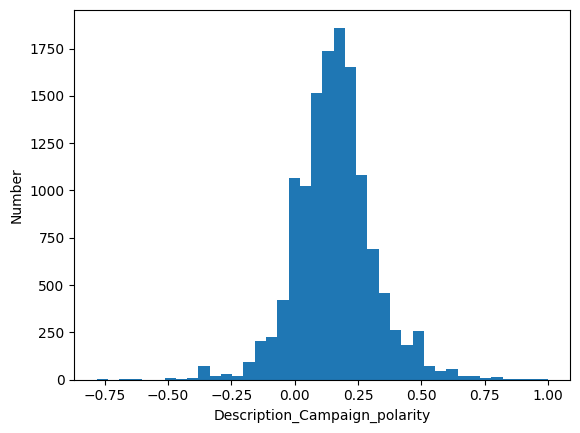

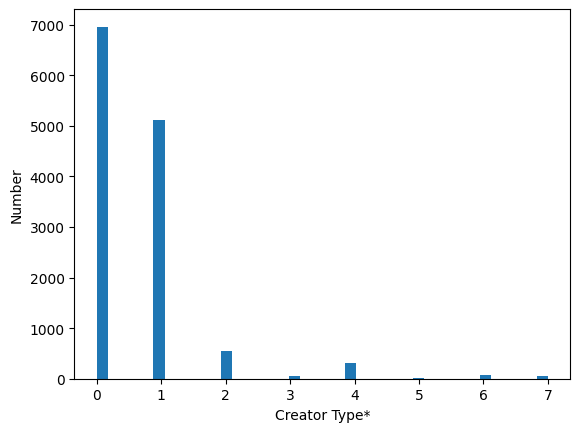

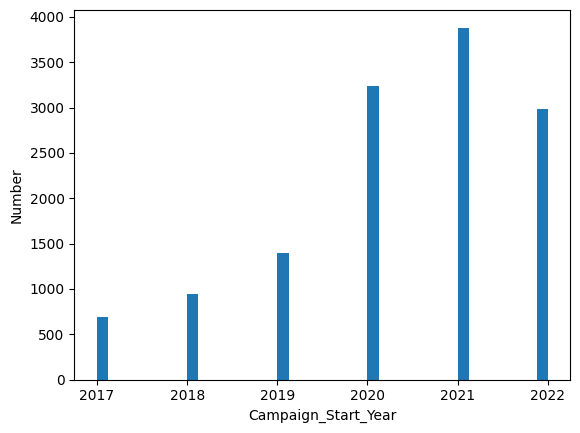

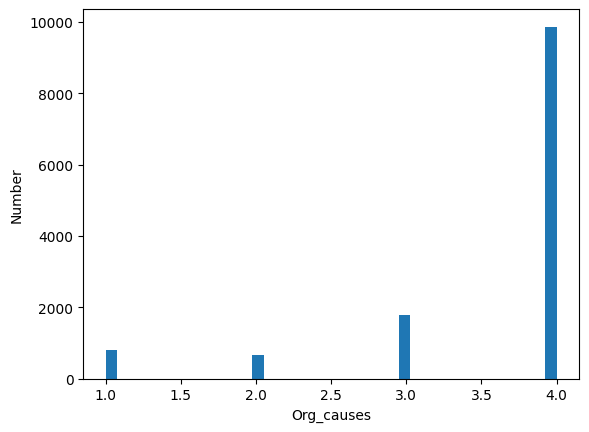

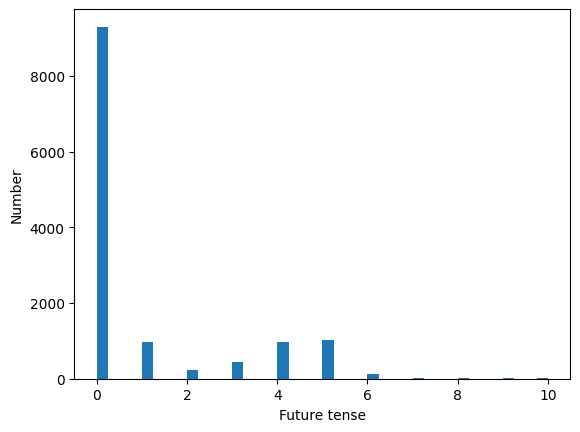

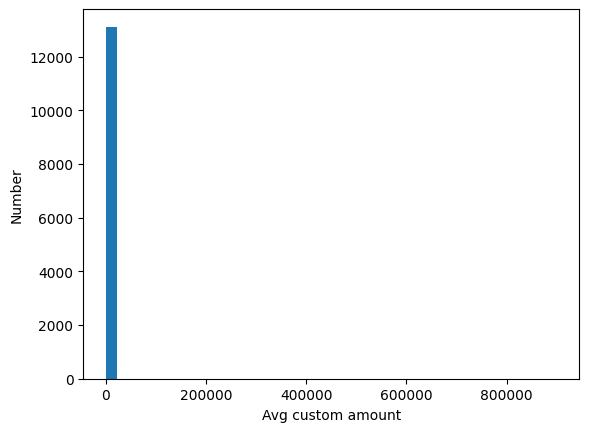

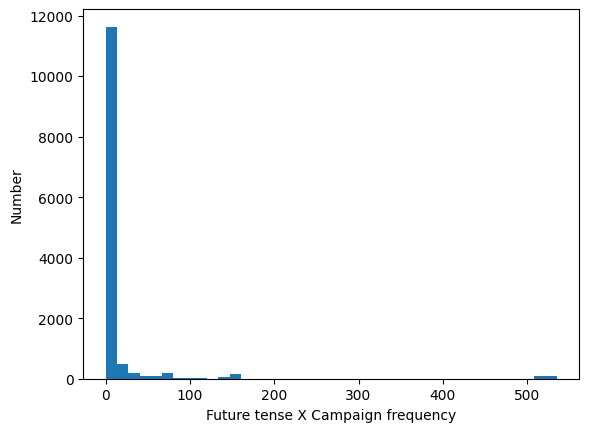

In [1288]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Actual Donation Amount'], bins=40, range=(0,300000))
plt.xlabel('Actual Donation Amount'); plt.ylabel('Number')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Campaign Goal'], bins=40, range=(0,300000))
plt.xlabel('Campaign Goal'); plt.ylabel('Number')
plt.show()

#plt.subplot(443)
plt.hist(extract_data['NPO Ipc Status For Tax Deductibility'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Number')
plt.show()
#plt.subplot(444)
plt.hist(extract_data['Campaign Duration'], bins=40)
plt.xlabel('Duration day'); plt.ylabel('Number')
plt.show()
#plt.subplot(445)
plt.hist(extract_data['Campaign Video'], bins=40)
plt.xlabel('Campaign Video'); plt.ylabel('Number')
plt.show()

#plt.subplot(446)
plt.hist(extract_data['Campaign Image Number'], bins=40)
plt.xlabel('Campaign Image Number'); plt.ylabel('Number')
plt.show()

#plt.subplot(447)
plt.hist(extract_data['Number of words describing campaign'], bins=40)
plt.xlabel('Number of words describing campaign'); plt.ylabel('Number')
plt.show()

#plt.subplot(448)
plt.hist(extract_data['Cam_causes'], bins=40)
plt.xlabel('Cam_causes'); plt.ylabel('Number')
plt.show()

#plt.subplot(449)
plt.hist(extract_data['Description_Campaign_polarity'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Number')
plt.show()

#plt.subplot(4,4,10)
plt.hist(extract_data['Creator Type*'], bins=40)
plt.xlabel('Creator Type*'); plt.ylabel('Number')
plt.show()

#plt.subplot(4,4,11)
plt.hist(extract_data['Campaign_Start_Year'], bins=40)
plt.xlabel('Campaign_Start_Year'); plt.ylabel('Number')
plt.show()

#plt.subplot(4,4,12)
plt.hist(extract_data['Org_causes'], bins=40)
plt.xlabel('Org_causes'); plt.ylabel('Number')
plt.show()

#plt.subplot(4,4,13)
plt.hist(extract_data['Future tense'], bins=40)
plt.xlabel('Future tense'); plt.ylabel('Number')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Avg custom amount'], bins=40)
plt.xlabel('Avg custom amount'); plt.ylabel('Number')
plt.show()

#plt.subplot(4,4,15)
plt.hist(extract_data['Future tense X Campaign frequency'], bins=40)
plt.xlabel('Future tense X Campaign frequency'); plt.ylabel('Number')
plt.show()


In [1289]:
numeric_features1

['Log actual Donation Amount',
 'Log campaign Goal',
 'NPO Ipc Status For Tax Deductibility',
 'Log campaign Duration',
 'Campaign Video',
 'Campaign Image Number',
 'Number of words describing campaign',
 'Description_Campaign_polarity',
 'Creator Type*',
 'Campaign_Start_Year',
 'Org_causes',
 'Cam_causes',
 'Future tense',
 'Log avg custom amount',
 'Future tense X Campaign frequency',
 'Campaign frequency X Log avg custom amount']

Text(0, 0.5, 'Number')

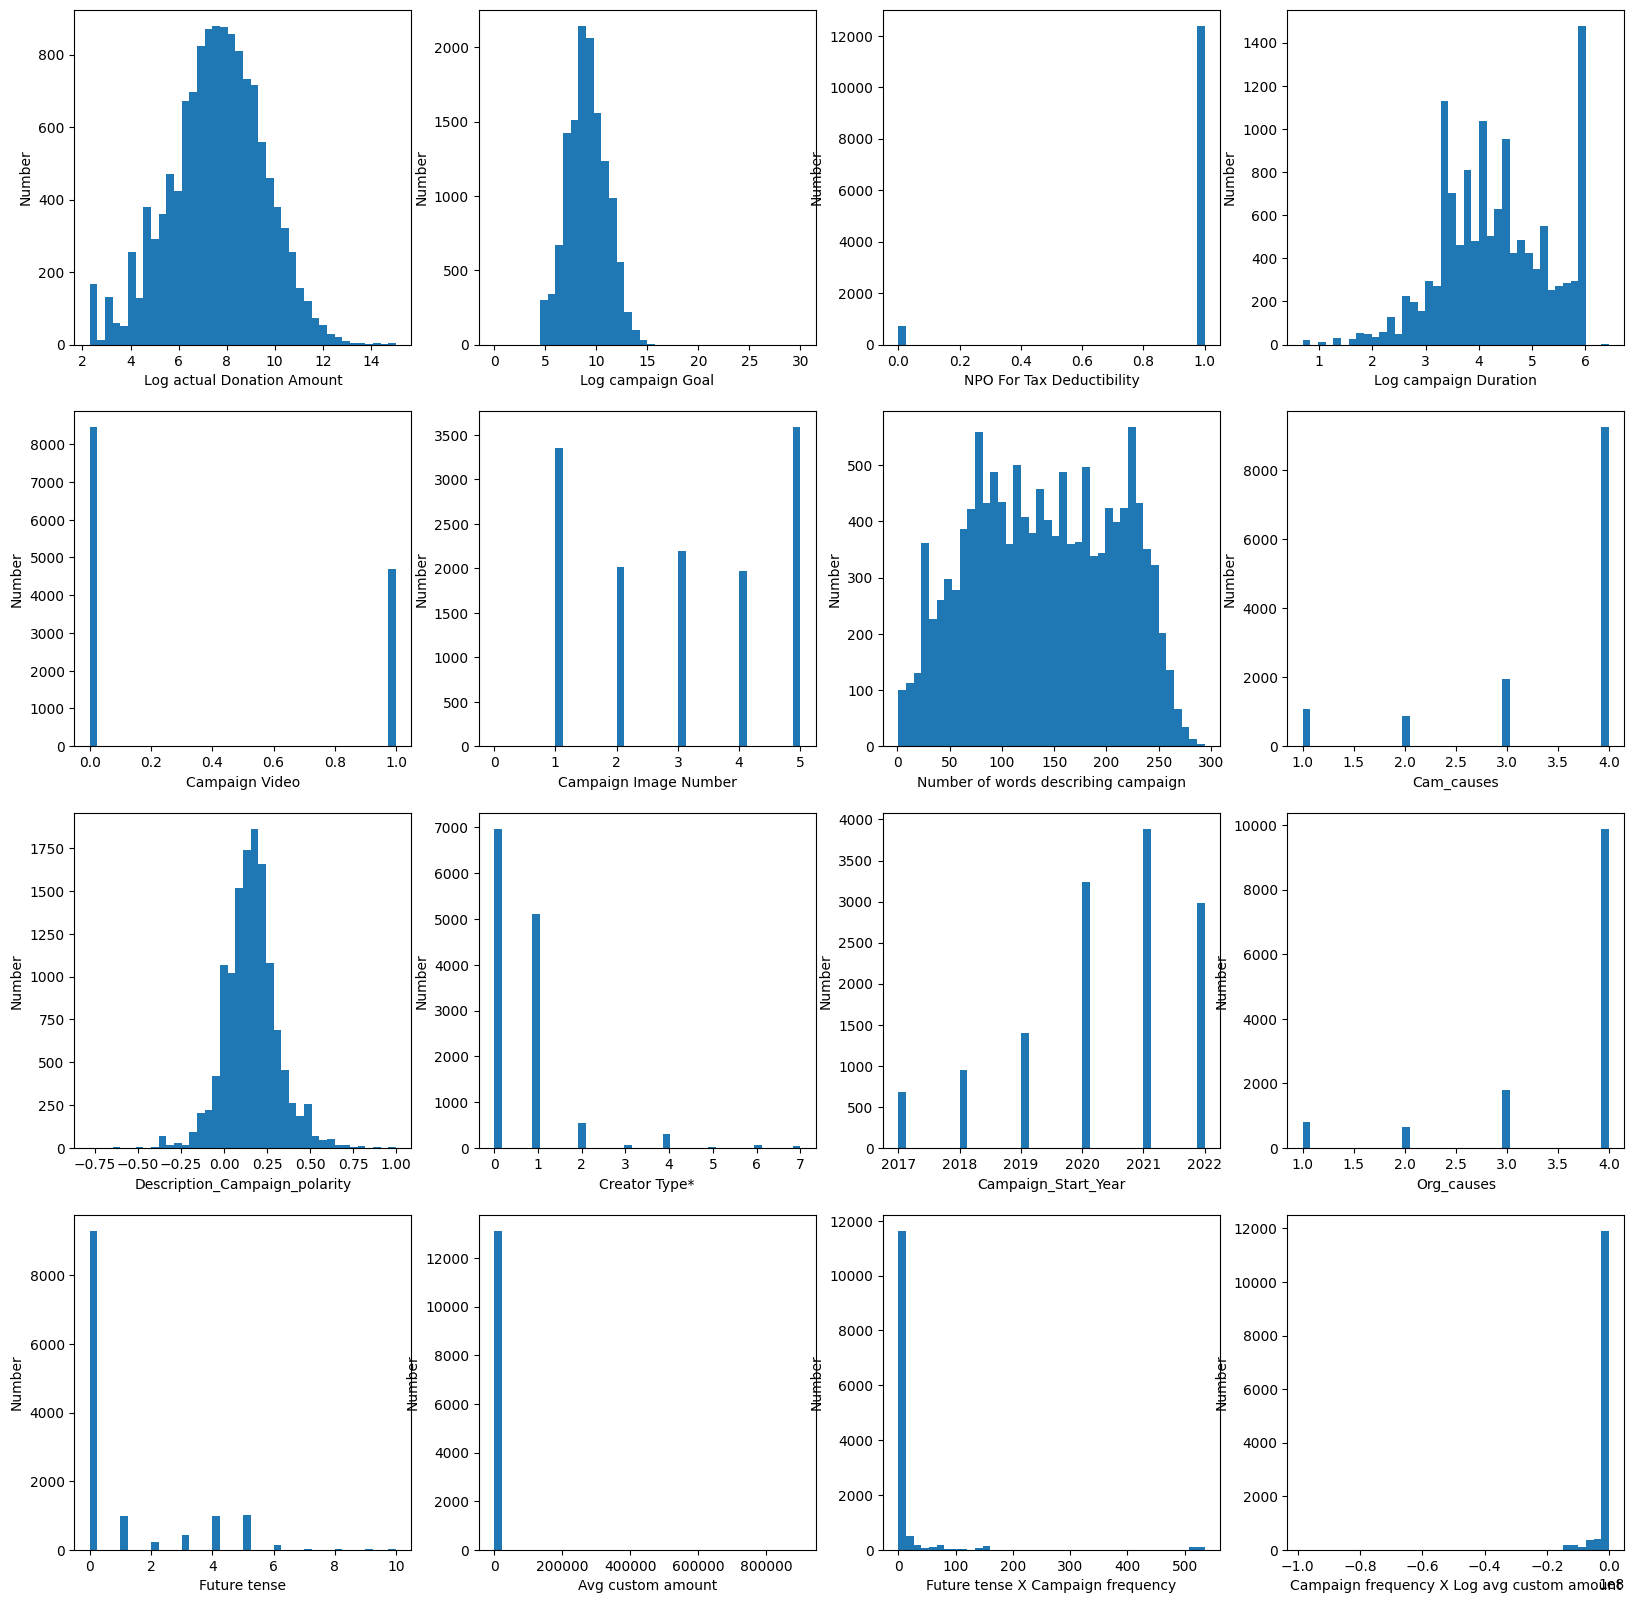

In [1290]:
numeric_features1

plt.figure(figsize=(20,20))

plt.subplot(441)
plt.hist(extract_data['Log actual Donation Amount'], bins=40)
plt.xlabel('Log actual Donation Amount'); plt.ylabel('Number')

plt.subplot(442)
plt.hist(extract_data['Log campaign Goal'], bins=40, range=(0,30))
plt.xlabel('Log campaign Goal'); plt.ylabel('Number')

plt.subplot(443)
plt.hist(extract_data['NPO Ipc Status For Tax Deductibility'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Number')

plt.subplot(444)
plt.hist(extract_data['Log campaign Duration'], bins=40)
plt.xlabel('Log campaign Duration'); plt.ylabel('Number')

plt.subplot(445)
plt.hist(extract_data['Campaign Video'], bins=40)
plt.xlabel('Campaign Video'); plt.ylabel('Number')

plt.subplot(446)
plt.hist(extract_data['Campaign Image Number'], bins=40)
plt.xlabel('Campaign Image Number'); plt.ylabel('Number')

plt.subplot(447)
plt.hist(extract_data['Number of words describing campaign'], bins=40)
plt.xlabel('Number of words describing campaign'); plt.ylabel('Number')

plt.subplot(448)
plt.hist(extract_data['Cam_causes'], bins=40)
plt.xlabel('Cam_causes'); plt.ylabel('Number')

plt.subplot(449)
plt.hist(extract_data['Description_Campaign_polarity'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Number')

plt.subplot(4,4,10)
plt.hist(extract_data['Creator Type*'], bins=40)
plt.xlabel('Creator Type*'); plt.ylabel('Number')

plt.subplot(4,4,11)
plt.hist(extract_data['Campaign_Start_Year'], bins=40)
plt.xlabel('Campaign_Start_Year'); plt.ylabel('Number')

plt.subplot(4,4,12)
plt.hist(extract_data['Org_causes'], bins=40)
plt.xlabel('Org_causes'); plt.ylabel('Number')

plt.subplot(4,4,13)
plt.hist(extract_data['Future tense'], bins=40)
plt.xlabel('Future tense'); plt.ylabel('Number')

plt.subplot(4,4,14)
plt.hist(extract_data['Avg custom amount'], bins=40)
plt.xlabel('Avg custom amount'); plt.ylabel('Number')

plt.subplot(4,4,15)
plt.hist(extract_data['Future tense X Campaign frequency'], bins=40)
plt.xlabel('Future tense X Campaign frequency'); plt.ylabel('Number')

plt.subplot(4,4,16)
plt.hist(extract_data['Campaign frequency X Log avg custom amount'], bins=40)
plt.xlabel('Campaign frequency X Log avg custom amount'); plt.ylabel('Number')



<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [1291]:
'''
def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features1]
for i in numeric_features1:
	print(i, "\t", vif(df=test_data, col_i=i))
'''

'\ndef vif(df, col_i):\n\tfrom statsmodels.formula.api import ols\n\tcols = list(df.columns)\n\tcols.remove(col_i)\n\tcols_noti = cols\n\tformula = col_i + \'~\' + \'+\'.join(cols_noti)\n\tr2 = ols(formula, df).fit().rsquared\n\treturn 1.0 / (1.0 - r2)\n\t\ntest_data = extract_data[numeric_features1]\nfor i in numeric_features1:\n\tprint(i, "\t", vif(df=test_data, col_i=i))\n'

In [1292]:
extract_data[numeric_features1].dtypes

Log actual Donation Amount                    float64
Log campaign Goal                             float64
NPO Ipc Status For Tax Deductibility            int64
Log campaign Duration                         float64
Campaign Video                                  int64
Campaign Image Number                           int64
Number of words describing campaign             int64
Description_Campaign_polarity                 float64
Creator Type*                                   int64
Campaign_Start_Year                             int64
Org_causes                                      int64
Cam_causes                                      int64
Future tense                                    int64
Log avg custom amount                         float64
Future tense X Campaign frequency             float64
Campaign frequency X Log avg custom amount    float64
dtype: object

In [1336]:

def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features1]
for i in numeric_features1:
	print(i, "\t", vif(df=test_data, col_i=i))

SyntaxError: invalid syntax (<unknown>, line 1)

In [1334]:
test_data = extract_data[numeric_features1]
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


[49.951661859174656, 1.5053739970355047, 1.5536504350294276, 1.0088630841506858, 1.0545937925232036, 1.0067869906911513, 1.0174872549040794, 1.0211917699207935, 1.0058622475276782, 1.748388428500981, 1.739945006594495]


In [1294]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


[4.274216737210068e-07, 0.5961182743837918, 0.984675454169639, 0.8126321202982087, 0.9638434945493803, 0.9366115200659332, 0.8989528674443, 0.971405752331725, 0.5257789031422353, 0.8938914349385911, 0.5560168867367864, 0.5399841160399782, 0.6492486301145416, 0.3282017345588071, 0.7957703331814185, 0.7875804769399767]


# <font size =6 face = 'time new roman' color = red> Based on the result only the "Custom_Amount1-4" 's multi collinearity is high. Other variables seem reasonable.</font>

In [1335]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant 
X = test_data  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 


Actual Donation Amount                   1.549766
Campaign Goal                            1.699060
NPO Ipc Status For Tax Deductibility    11.471652
Campaign Duration                        2.119428
Campaign Video                           1.557181
Campaign Image Number                    4.517790
Number of words describing campaign      4.841774
Description_Campaign_polarity            1.988924
Org_causes                              28.488294
Cam_causes                              25.015247
dtype: float64


In [1296]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

In [1297]:
extract_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Campaign frequency,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Future tense,Log actual Donation Amount,Log distinct Donors,Log campaign Goal,Log campaign Duration,Log avg custom amount,Future tense X Campaign frequency,Campaign frequency X Log avg custom amount,Campaign success,Log campaign success
0,4608063,World Suicide Prevention Day 2017,Samaritans of Singapore,3102869,True,1,1,0,3102869,ENDED,...,1,8.623533,4.189655,10.819778,5.529429,4.49981,1.0,4.499810,0.111220,-2.196245
1,4648574,Enabling Lives,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,0,3105759,ENDED,...,0,7.940940,3.465736,9.903488,4.488636,4.49981,0.0,8.999619,0.140500,-1.962548
2,4661665,SPD Charity Hongbao 2017,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,0,3105759,ENDED,...,0,7.019297,3.091042,10.308953,4.060443,4.49981,0.0,8.999619,0.037267,-3.289656
3,4716038,Sundown Run 2017 - Running 4 HFH,Habitat for Humanity Singapore Ltd,3706352,True,2,1,1,4614452,ENDED,...,0,7.937375,1.945910,7.600902,4.477337,-100000.00000,0.0,-200000.000000,1.400000,0.336472
4,4729527,Child For Child,Children's Cancer Foundation,3105049,False,2,1,1,4697816,ENDED,...,0,7.615791,3.295837,8.517193,3.912023,-100000.00000,0.0,-200000.000000,0.406000,-0.901402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,81620010,#EndowusGivesBack to Gardens by the Bay,Gardens by the Bay,44329126,True,2,1,2,67580280,ACTIVE,...,0,2.302585,0.000000,8.517193,4.127134,-100000.00000,0.0,-200000.000000,0.002000,-6.214608
15975,81633179,Support Loke Chui Yee in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,1,63267540,ACTIVE,...,0,5.010635,1.386294,9.210340,3.401197,-100000.00000,0.0,-500000.000000,0.015000,-4.199705
15976,81633303,Support Derek Tse in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,1,63267540,ACTIVE,...,0,6.907755,2.302585,6.907755,3.401197,-100000.00000,0.0,-500000.000000,1.000000,0.000000
15977,81635547,WE@SG Trivia Night,Daughters Of Tomorrow Limited,3675791,True,4,1,1,81631190,ACTIVE,...,0,4.787492,0.693147,8.006368,4.110874,-100000.00000,0.0,-400000.000000,0.040000,-3.218876


<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [1298]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [1299]:
for title in numeric_features1:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    #print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    

Log actual Donation Amount Median: 7.6073501996856345
Log actual Donation Amount Std: 1.958155242343944
Log actual Donation Amount Min: 2.302585092994046
Log actual Donation Amount Max: 15.04855758112076
Log campaign Goal Median: 9.043551170301512
Log campaign Goal Std: 1.9304547950617879
Log campaign Goal Min: 4.605170185988092
Log campaign Goal Max: 15.424948470398375
NPO Ipc Status For Tax Deductibility Median: 0.943860450944546
NPO Ipc Status For Tax Deductibility Std: 0.2301910078332867
NPO Ipc Status For Tax Deductibility Min: 0
NPO Ipc Status For Tax Deductibility Max: 1
Log campaign Duration Median: 4.3037443305594625
Log campaign Duration Std: 1.009475619056843
Log campaign Duration Min: 0.6931471805599453
Log campaign Duration Max: 6.4457198193855785
Campaign Video Median: 0.3566422912858013
Campaign Video Std: 0.47900789904991653
Campaign Video Min: 0
Campaign Video Max: 1
Campaign Image Number Median: 3.0302407068860453
Campaign Image Number Std: 1.5564973225956016
Campaign

# New Version 1 model

In [1300]:
'''
import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ Total_distance+ \
    Campaign Image Number  + Number of words describing campaign  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+\
     Description_Campaign_subjectivity + Avg custom amount', data = extract_data).fit()

results2 = model2.summary()
print(results2)
'''

"\nimport statsmodels.formula.api as smf\n\nmodel2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ Total_distance+     Campaign Image Number  + Number of words describing campaign  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+     Description_Campaign_subjectivity + Avg custom amount', data = extract_data).fit()\n\nresults2 = model2.summary()\nprint(results2)\n"

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [1301]:
extract_data["Campaign_Start_Year"] = pd.to_numeric(extract_data["Campaign_Start_Year"])
extract_data["Creator Type*"] = pd.to_numeric(extract_data["Creator Type*"])

Text(0, 0.5, 'Sepal Width')

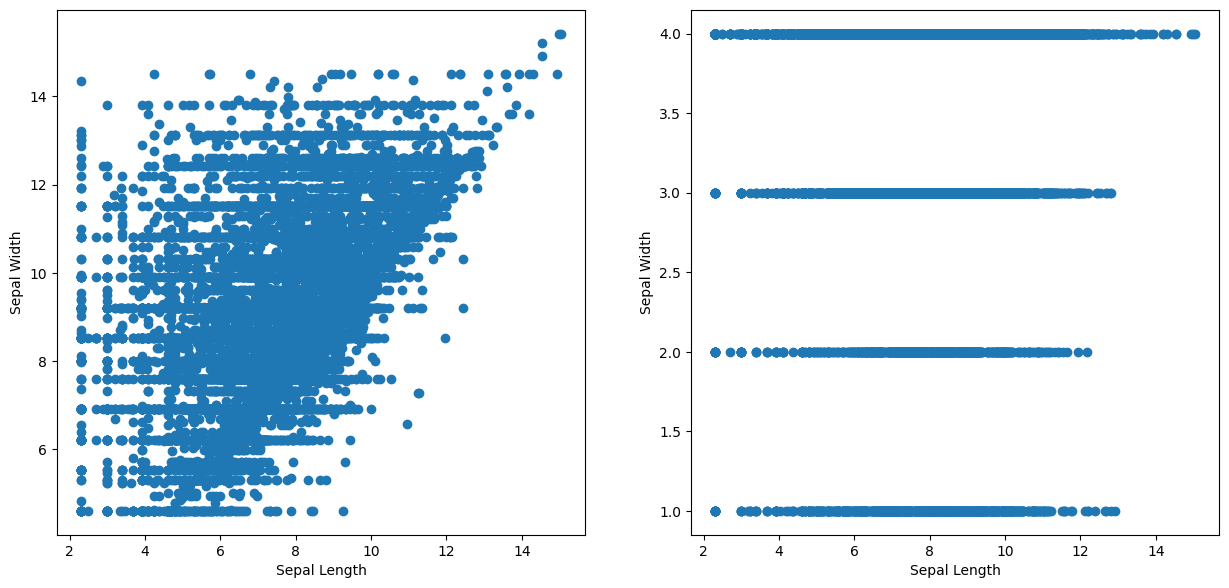

In [1302]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Log actual Donation Amount"], extract_data["Log campaign Goal"])
#plt.xlim(0,30000)
#plt.ylim(0,30000)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Log actual Donation Amount"], extract_data["Org_causes"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

In [1315]:
extract_data.columns[-30:]

Index(['Web URL', 'Facebook Link', 'Donation_per_donor', 'Org_causes',
       'Cam_causes', 'Campaign Image Number', 'Campaign_Start_Day',
       'Campaign_Start_Month', 'Campaign_Start_Year', 'Campaign_End_Day',
       'Campaign_End_Month', 'Campaign_End_Year', 'Campaign_Start',
       'Campaign_End', 'Campaign Duration', 'Campaign_Start_Year_category',
       'Number of words describing campaign', 'Num_desc_NPO',
       'Avg custom amount', 'Description_Campaign_polarity', 'Future tense',
       'Log actual Donation Amount', 'Log distinct Donors',
       'Log campaign Goal', 'Log campaign Duration', 'Log avg custom amount',
       'Future tense X Campaign frequency',
       'Campaign frequency X Log avg custom amount', 'Campaign success',
       'Log campaign success'],
      dtype='object')

In [1332]:
Model1_variables = ['Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes','Cam_causes']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Actual Donation Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)



                              OLS Regression Results                              
Dep. Variable:     Actual Donation Amount   R-squared:                       0.338
Model:                                OLS   Adj. R-squared:                  0.337
Method:                     Least Squares   F-statistic:                     608.2
Date:                    Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                            14:54:59   Log-Likelihood:            -1.6225e+05
No. Observations:                   13128   AIC:                         3.245e+05
Df Residuals:                       13116   BIC:                         3.246e+05
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Model 2

In [1304]:
extract_data["Future tense"] = pd.to_numeric(extract_data["Future tense"])

In [1305]:
Model2_variables = ['Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense']

import statsmodels.formula.api as smf
X2 = extract_data[Model2_variables] 
Y2 = extract_data['Actual Donation Amount']
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
model2 = sm.OLS(Y2, X2).fit()

results2 = model2.summary()
#predicts = model2._results
print(results2)

                              OLS Regression Results                              
Dep. Variable:     Actual Donation Amount   R-squared:                       0.338
Model:                                OLS   Adj. R-squared:                  0.338
Method:                     Least Squares   F-statistic:                     558.9
Date:                    Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                            14:34:34   Log-Likelihood:            -1.6224e+05
No. Observations:                   13128   AIC:                         3.245e+05
Df Residuals:                       13115   BIC:                         3.246e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Model3

In [1306]:
Model3_variables = ['Log campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Log campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense', 'Log avg custom amount']

import statsmodels.formula.api as smf
X3 = extract_data[Model3_variables] 
Y3 = extract_data['Log actual Donation Amount']
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model3 = sm.OLS(Y3, X3).fit()

results3 = model3.summary()
#predicts = model3._results
print(results3)


                                OLS Regression Results                                
Dep. Variable:     Log actual Donation Amount   R-squared:                       0.294
Model:                                    OLS   Adj. R-squared:                  0.293
Method:                         Least Squares   F-statistic:                     419.3
Date:                        Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                                14:34:35   Log-Likelihood:                -25168.
No. Observations:                       13128   AIC:                         5.036e+04
Df Residuals:                           13114   BIC:                         5.047e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model4


In [1307]:
Model4_variables = ['Log campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Log campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense', 'Log avg custom amount', 'Future tense X Campaign frequency']

import statsmodels.formula.api as smf
X4 = extract_data[Model4_variables] 
Y4 = extract_data['Log actual Donation Amount']
# with statsmodels
X4 = sm.add_constant(X4) # adding a constant
model4 = sm.OLS(Y4, X4).fit()

results4 = model4.summary()
#predicts = model4._results
print(results4)

                                OLS Regression Results                                
Dep. Variable:     Log actual Donation Amount   R-squared:                       0.294
Model:                                    OLS   Adj. R-squared:                  0.293
Method:                         Least Squares   F-statistic:                     390.1
Date:                        Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                                14:34:35   Log-Likelihood:                -25164.
No. Observations:                       13128   AIC:                         5.036e+04
Df Residuals:                           13113   BIC:                         5.047e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model5-1

In [1308]:
Model5_variables_1 = ['Log campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Log campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense', 'Log avg custom amount', 
                     'Campaign frequency X Log avg custom amount']

import statsmodels.formula.api as smf
X5 = extract_data[Model5_variables_1] 
Y5 = extract_data['Log actual Donation Amount']
# with statsmodels
X5 = sm.add_constant(X5) # adding a constant
model5_1 = sm.OLS(Y5, X5).fit()

results5_1 = model5_1.summary()
#predicts = model4._results
print(results5_1)

                                OLS Regression Results                                
Dep. Variable:     Log actual Donation Amount   R-squared:                       0.296
Model:                                    OLS   Adj. R-squared:                  0.295
Method:                         Least Squares   F-statistic:                     393.1
Date:                        Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                                14:34:35   Log-Likelihood:                -25149.
No. Observations:                       13128   AIC:                         5.033e+04
Df Residuals:                           13113   BIC:                         5.044e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

# Model5-2

In [1309]:
Model5_variables = ['Log campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Log campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense', 'Log avg custom amount', 'Future tense X Campaign frequency',
                     'Campaign frequency X Log avg custom amount']

import statsmodels.formula.api as smf
X5 = extract_data[Model5_variables] 
Y5 = extract_data['Log actual Donation Amount']
# with statsmodels
X5 = sm.add_constant(X5) # adding a constant
model5 = sm.OLS(Y5, X5).fit()

results5 = model5.summary()
#predicts = model4._results
print(results5)

                                OLS Regression Results                                
Dep. Variable:     Log actual Donation Amount   R-squared:                       0.296
Model:                                    OLS   Adj. R-squared:                  0.295
Method:                         Least Squares   F-statistic:                     367.5
Date:                        Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                                14:34:35   Log-Likelihood:                -25146.
No. Observations:                       13128   AIC:                         5.032e+04
Df Residuals:                           13112   BIC:                         5.044e+04
Df Model:                                  15                                         
Covariance Type:                    nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

# Model 6

In [1310]:
Model6_variables = ['Log campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Log campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense', 'Log avg custom amount', 'Future tense X Campaign frequency',
                     'Campaign frequency X Log avg custom amount']

import statsmodels.formula.api as smf
X6 = extract_data[Model6_variables] 
Y6 = extract_data['Log distinct Donors']
# with statsmodels
X6 = sm.add_constant(X6) # adding a constant
model6 = sm.OLS(Y6, X6).fit()

results6 = model6.summary()
#predicts = model4._results
print(results6)



                             OLS Regression Results                            
Dep. Variable:     Log distinct Donors   R-squared:                       0.217
Model:                             OLS   Adj. R-squared:                  0.216
Method:                  Least Squares   F-statistic:                     241.8
Date:                 Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                         14:34:35   Log-Likelihood:                -22264.
No. Observations:                13128   AIC:                         4.456e+04
Df Residuals:                    13112   BIC:                         4.468e+04
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1311]:
Model6_variables = ['Log campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Log campaign Duration',
                     'Campaign Video',  'Campaign Image Number','Number of words describing campaign', 'Description_Campaign_polarity',
                     "Creator Type*", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future tense', 'Log avg custom amount', 'Future tense X Campaign frequency',
                     'Campaign frequency X Log avg custom amount']

import statsmodels.formula.api as smf
X6 = extract_data[Model6_variables] 
Y6 = extract_data['Log campaign success']
# with statsmodels
X6 = sm.add_constant(X6) # adding a constant
model6 = sm.OLS(Y6, X6).fit()

results6 = model6.summary()
#predicts = model4._results
print(results6)



                             OLS Regression Results                             
Dep. Variable:     Log campaign success   R-squared:                       0.256
Model:                              OLS   Adj. R-squared:                  0.255
Method:                   Least Squares   F-statistic:                     300.9
Date:                  Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                          14:34:35   Log-Likelihood:                -25146.
No. Observations:                 13128   AIC:                         5.032e+04
Df Residuals:                     13112   BIC:                         5.044e+04
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

# Other old models 

In [1312]:
import statsmodels.formula.api as smf
X = extract_data[[ 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'Campaign Duration', 'Campaign Video',  'Campaign Image Number','Number of words describing campaign',  'Cam_causes', 
                     'Description_Campaign_polarity',"Creator Type*", "Scale_type","Sector", "Campaign_Start_Year", 'Campaign Promise', 'Org_causes']] 
Y = extract_data['Distinct Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)


KeyError: "['Scale_type', 'Sector', 'Campaign Promise'] not in index"

# 需要删除的没有用到的列

In [ ]:
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'

extract_data['Msg_category'] # 旧的分类

In [ ]:
# Output new csv file
extract_data.to_csv('Cleaned_data_model1.csv')

In [ ]:
'''
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign Id*'][mysample]
y = extract_data['Actual Donation Amount'][mysample]
y_fitted = model1.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'*',label='OLS')
'''

KeyError: '[7656, 7553, 4486, 7349, 7610] not in index'

<font face = "Time New Roman" size = 5 color = red>Test normality. fellow normal distribution or not</font>

In [ ]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model1.resid
result = lilliefors(list(model_resid))
print(result)

(0.29990439794554413, 0.0009999999999998899)


In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

NameError: name 'model_resid' is not defined

(array([1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 8.000e+00,
        8.000e+00, 2.200e+01, 2.300e+01, 3.500e+01, 5.100e+01, 7.900e+01,
        1.310e+02, 1.800e+02, 2.360e+02, 3.310e+02, 3.820e+02, 5.370e+02,
        6.630e+02, 8.240e+02, 9.950e+02, 1.025e+03, 1.252e+03, 2.339e+03,
        1.436e+03, 1.337e+03, 1.146e+03, 8.710e+02, 6.250e+02, 3.970e+02,
        2.590e+02, 1.690e+02, 1.080e+02, 9.300e+01, 4.100e+01, 4.500e+01,
        1.200e+01, 1.700e+01, 1.300e+01, 5.000e+00]),
 array([-9.46434694, -9.05381872, -8.64329049, -8.23276226, -7.82223404,
        -7.41170581, -7.00117758, -6.59064936, -6.18012113, -5.76959291,
        -5.35906468, -4.94853645, -4.53800823, -4.12748   , -3.71695177,
        -3.30642355, -2.89589532, -2.48536709, -2.07483887, -1.66431064,
        -1.25378241, -0.84325419, -0.43272596, -0.02219773,  0.38833049,
         0.79885872,  1.20938694,  1.61991517,  2.0304434 ,  2.44097162,
         2.85149985,  3.26202808,  3.6725563 ,  4.08308453,  4.4

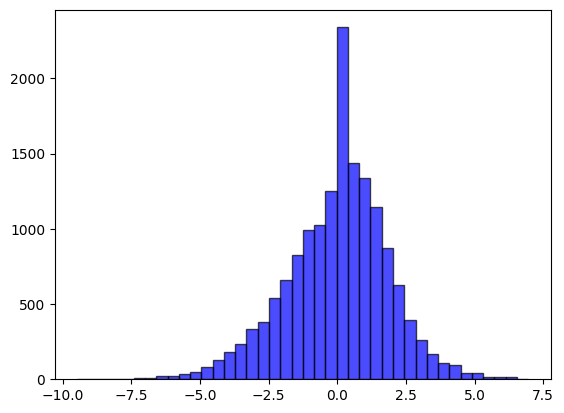

In [ ]:

plt.hist(model5.resid, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)


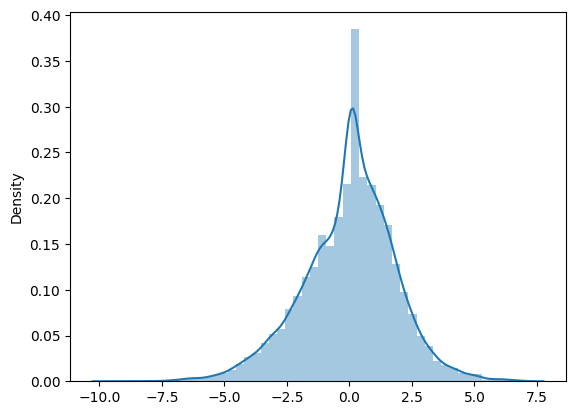

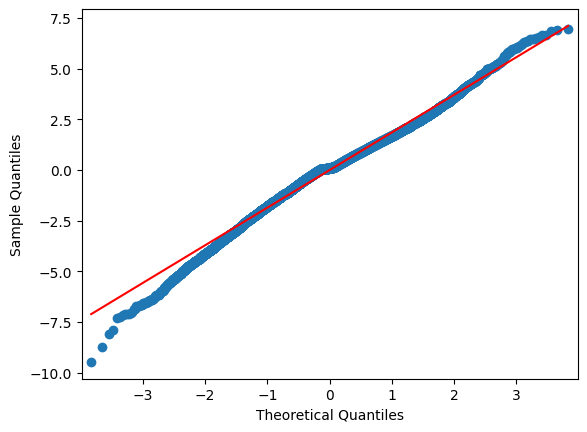

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

# 样例1

res = model5.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
sns.distplot(res)
plt.show()
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s') # 调用函数

plt.show()

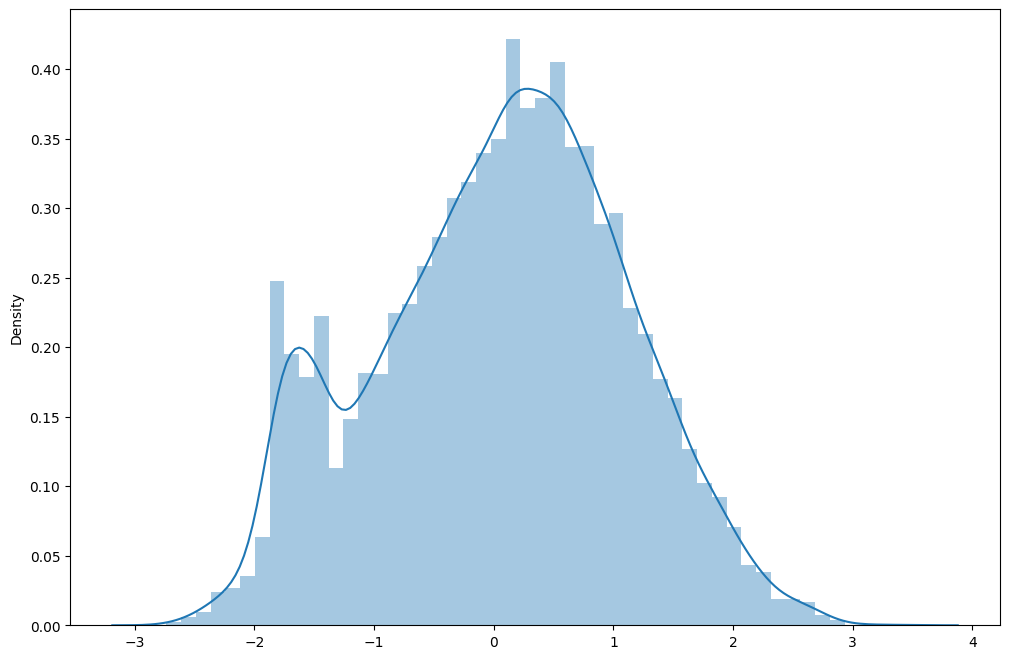

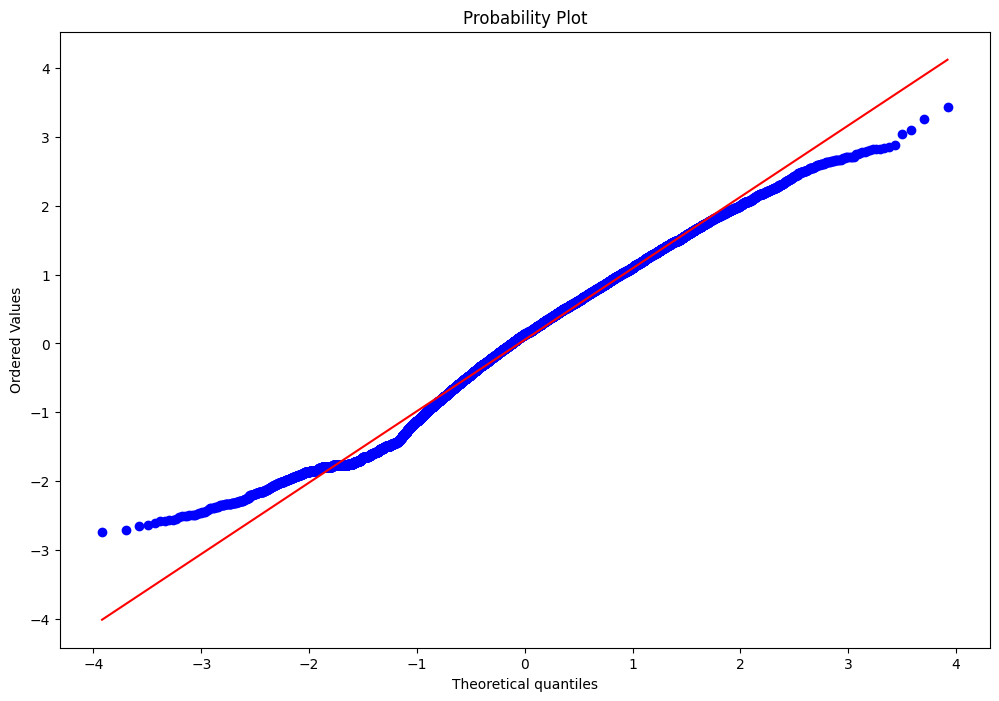

In [ ]:
from scipy.stats import norm, skew #for some statistics
res2 = abs(res)
fig, ax = plt.subplots(figsize=[12,8])
converted_data1 = stats.boxcox(res2)[0] #对数据进行BOX-COX变换
sns.distplot(converted_data1)
plt.show()
fig, ax = plt.subplots(figsize=[12,8])
prob = stats.probplot(converted_data1, dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()


<font face = "Time New Roman" size = 5 color =red> Model 2</font>

In [ ]:
model_resid2 = model2.resid
result = lilliefors(list(model_resid2))
print(result)

(0.3166991231981999, 0.0009999999999998899)


In [ ]:
variables_data3

NameError: name 'variables_data3' is not defined

<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [ ]:
variables_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual_Donation_Amount  15979 non-null  float64
 1   Campaign_Goal           15979 non-null  int64  
 2   NPO_Tax_Deductibility   15979 non-null  int64  
 3   duration_day            15979 non-null  int64  
 4   Campaign_Image_num      15979 non-null  int64  
 5   Campaign_Video          15979 non-null  int64  
 6   Msg_category            15979 non-null  int64  
 7   Num_desc_cam            15979 non-null  int64  
 8   Num_desc_NPO            15979 non-null  int64  
 9   Org_causes              15979 non-null  int64  
 10  Cam_causes              15979 non-null  int64  
 11  Custom_Amount1          15979 non-null  int64  
 12  Custom_Amount2          15979 non-null  int64  
 13  Custom_Amount3          15979 non-null  int64  
 14  Custom_Amount4          15979 non-null

In [ ]:
model3 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + Campaign Duration + \
    Campaign Image Number  + Campaign_Video + Msg_category+\
    Number of words describing campaign + Num_desc_NPO + Org_causes + Cam_causes', data = variables_data3).fit()

results3 = model3.summary()
print(results3)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.307
Model:                                OLS   Adj. R-squared:                  0.306
Method:                     Least Squares   F-statistic:                     706.9
Date:                    Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                            23:47:28   Log-Likelihood:            -1.9632e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15968   BIC:                         3.927e+05
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Residuals

In [ ]:
model.resid

0        -6502.023006
1        -6383.130003
2       -10109.009621
3         3680.179976
4          -31.460896
             ...     
15974    -1809.426473
15975     -307.708669
15976     2575.192535
15977     1031.338847
15978    -4940.357032
Length: 15979, dtype: float64

Author: Guo Shiping
Created by 27/Jan/2023

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'